# Advanced Regression Assignment


## Housing Company : Surprise Housing

### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
Objectives:
- Variables are significant in predicting the price of a house
- Variables describe the price of a house
- Optimal values of lambda for ridge and lasso regression.


### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Data understanding, preparation and EDA

### Model building and evaluation


#### Steps:
- Reading, understanding and visualization
- Preparing and data for modelling(train-test split, rescaling etc)
- Model Building
    - Linear Regression
    - Ridge Regression
    - Lasso Regression
- Training the model
- Regularization
- Residual Analysis
- Predictions and evaluation on the test set

### Step 1: Reading and Understanding the data

Importing library NumPy and Pandas for reading data : bikesharingdata

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Warning suppression
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load the dataset
df = pd.read_csv('train.csv')
#Display the first few rows of the dataset
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Number of rows and columns

In [5]:
# Shape of the dataset
df.shape

(1460, 81)

In [6]:
# Overrdin the default pd.set_option settings to improve display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 0)  # auto-detect terminal/renderer width
df.head()  # Display the first few rows again with updated settings

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

Data info:  Ways of check the missing values or unwanted data sets

In [7]:
# Information/Understanding about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As per above info there is no missing values in the dataset. We can further check and validate using null count both column and row wise

In [8]:
# Statistical Summarise of numerical values using describe function
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [9]:
# Checking not null count vertically column wise
df.notnull().sum()/len(df)*100


Id               100.000000
MSSubClass       100.000000
MSZoning         100.000000
LotFrontage       82.260274
LotArea          100.000000
Street           100.000000
Alley              6.232877
LotShape         100.000000
LandContour      100.000000
Utilities        100.000000
LotConfig        100.000000
LandSlope        100.000000
Neighborhood     100.000000
Condition1       100.000000
Condition2       100.000000
BldgType         100.000000
HouseStyle       100.000000
OverallQual      100.000000
OverallCond      100.000000
YearBuilt        100.000000
YearRemodAdd     100.000000
RoofStyle        100.000000
RoofMatl         100.000000
Exterior1st      100.000000
Exterior2nd      100.000000
MasVnrType        40.273973
MasVnrArea        99.452055
ExterQual        100.000000
ExterCond        100.000000
Foundation       100.000000
BsmtQual          97.465753
BsmtCond          97.465753
BsmtExposure      97.397260
BsmtFinType1      97.465753
BsmtFinSF1       100.000000
BsmtFinType2      97

In [10]:
# Checking whether a null value exists in given dataset row wise
df.isnull().sum(axis=1).sort_values(ascending=False)/len(df)*100

1218    1.095890
533     1.095890
39      1.095890
1011    1.095890
1179    1.027397
520     1.027397
705     1.027397
1030    0.821918
1321    0.821918
287     0.821918
1035    0.821918
375     0.821918
1143    0.821918
1326    0.753425
156     0.753425
942     0.753425
535     0.753425
165     0.753425
1323    0.753425
155     0.753425
736     0.753425
125     0.753425
897     0.753425
108     0.753425
894     0.753425
102     0.753425
613     0.753425
614     0.753425
868     0.753425
90      0.753425
89      0.753425
78      0.753425
843     0.753425
960     0.753425
210     0.753425
970     0.753425
1283    0.753425
342     0.753425
1123    0.753425
1137    0.753425
738     0.753425
1096    0.753425
1090    0.753425
386     0.753425
1049    0.753425
259     0.753425
1216    0.753425
1045    0.753425
434     0.753425
241     0.753425
1232    0.753425
1234    0.753425
1009    0.753425
1257    0.753425
1000    0.753425
826     0.753425
984     0.753425
976     0.753425
646     0.7534

#### Based on above validation, there seems to be missing values in the data set
- Lets perform quick check of the same

In [11]:
# Check if there are any missing values in the dataset
print("Are there any missing values in the dataset?", df.isna().sum().sum() > 0)  
## Check for missing values and get the count of missing values in each column  
print("Missing values in each column:\n", df.isna().sum())


Are there any missing values in the dataset? True
Missing values in each column:
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir      

#### Get the list of all the columns with missing or null values

In [13]:
# Function to get columns with missing values along with count and percentage
def null_columns_with_percentage(df):
    total = len(df)
    counts = df.isnull().sum()
    percentage = (counts / total * 100).round(2)
    out = pd.DataFrame({'Missing_Count': counts, 'Missing_Percentage': percentage})
    out = out[out['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    display(out)
    cols_with_nulls = out.index.tolist()
    print("Columns with missing values:", len(cols_with_nulls))
    print(cols_with_nulls)
    return out

# Calling the function
missing_stats = null_columns_with_percentage(df)

Missing_Count  Missing_Percentage
PoolQC                 1453               99.52
MiscFeature            1406               96.30
Alley                  1369               93.77
Fence                  1179               80.75
MasVnrType              872               59.73
FireplaceQu             690               47.26
LotFrontage             259               17.74
GarageType               81                5.55
GarageYrBlt              81                5.55
GarageFinish             81                5.55
GarageQual               81                5.55
GarageCond               81                5.55
BsmtFinType2             38                2.60
BsmtExposure             38                2.60
BsmtFinType1             37                2.53
BsmtCond                 37                2.53
BsmtQual                 37                2.53
MasVnrArea                8                0.55
Electrical                1                0.07

Columns with missing values: 19
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical']


#### From above outcome, there are 19 columns with missing values or null

##### Column Names:
 - 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage',
 - 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'
 - 'BsmtFinType2''BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical'

In [14]:
# Randomly checking a column with missing values
df['Alley']


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21      Grvl
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30      Pave
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52       NaN
53       NaN
54       NaN
55       NaN
56      Pave
57       NaN
58       NaN
59       NaN
60       NaN
61       NaN
62       NaN
63       NaN
64       NaN
65       NaN
66       NaN
67       NaN
68       NaN
69       NaN
70       NaN
71       NaN
72       NaN
73       NaN
74       NaN
75       NaN
76       NaN

In [15]:
# Load the data type of each column
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [16]:
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage',
        'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
        'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
        'MasVnrArea', 'Electrical']
existing = [c for c in cols if c in df.columns]
print("Dtypes:")
print(df[existing].dtypes)

Dtypes:
PoolQC           object
MiscFeature      object
Alley            object
Fence            object
MasVnrType       object
FireplaceQu      object
LotFrontage     float64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
BsmtFinType2     object
BsmtExposure     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
Electrical       object
dtype: object


In [17]:
# Based on the data dictionary and understanding of the dataset, below should be converted to object type
# Before conversion
df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')  
# After conversion
df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

### Data Cleaning:

#### Data Treatment is needed for the above columns 
Object Data Type: 
- PoolQC           
- MiscFeature      
- Alley            
- Fence            
- MasVnrType       
- FireplaceQu      
- GarageType       
- GarageFinish     
- GarageQual       
- GarageCond       
- BsmtFinType2     
- BsmtExposure     
- BsmtFinType1     
- BsmtCond         
- BsmtQual         
- Electrical       

Numeric Data Type:
- LotFrontage    
- GarageYrBlt    
- MasVnrArea    


In [18]:
## Replacing missing values in categorical columns with 'None'
cat_cols = [
    'PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
    'GarageType','GarageFinish','GarageQual','GarageCond',
    'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','Electrical'
]

existing = [c for c in cat_cols if c in df.columns]
for c in existing:
    df[c] = df[c].astype('object')
    df[c] = df[c].replace({'NA': 'None'}).fillna('None')

print("Updated columns:", existing)
# Calling the function
missing_stats = null_columns_with_percentage(df)


Updated columns: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']


Missing_Count  Missing_Percentage
LotFrontage            259               17.74
GarageYrBlt             81                5.55
MasVnrArea               8                0.55

Columns with missing values: 3
['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


In [19]:
# Replacinge numeric columns ['LotFrontage','GarageYrBlt','MasVnrArea'] with median 
num_cols = ['LotFrontage','GarageYrBlt','MasVnrArea']
existing_num = [c for c in num_cols if c in df.columns]

# Coerce to numeric in case of string 'NA'/non-numeric entries
for c in existing_num:
    df[c] = pd.to_numeric(df[c], errors='coerce')

fill_values = df[existing_num].median()

df[existing_num] = df[existing_num].fillna(fill_values)

# Calling the function
missing_stats = null_columns_with_percentage(df)

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

Columns with missing values: 0
[]


In [20]:
# Displaying the data types after handling missing values
df.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


##### After performing the above steps, number of missing columns is zero. We are good with data set interm of null and missing values.

In [21]:
#Check for duplicate rows or we can create a new dataframe removing duplicate rows
duplicate_rows = df.duplicated()
print("Number of duplicate rows: ", duplicate_rows.sum())  

Number of duplicate rows:  0


In [22]:
# Post data cleaning, check the shape of the dataset
print("Shape of the dataset after cleaning:", df.shape)

Shape of the dataset after cleaning: (1460, 81)


#### Differentiating the categorial and continous variables

In [23]:
# Create a copy of cleaned dataframe for numberical and categorical analysis
cleaned_df = df.copy()
cat_cols = df.select_dtypes(include=['object'])
num_cols = df.select_dtypes(include=['int64', 'float64'])


In [24]:
# Shape of numerical and categorical columns
print("Row and Column of Numerical columns:", num_cols.shape)
print("Row and Column of Categorical columns:", cat_cols.shape)

Row and Column of Numerical columns: (1460, 35)
Row and Column of Categorical columns: (1460, 46)


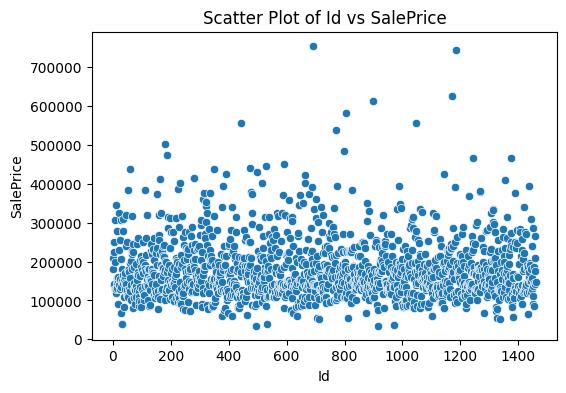

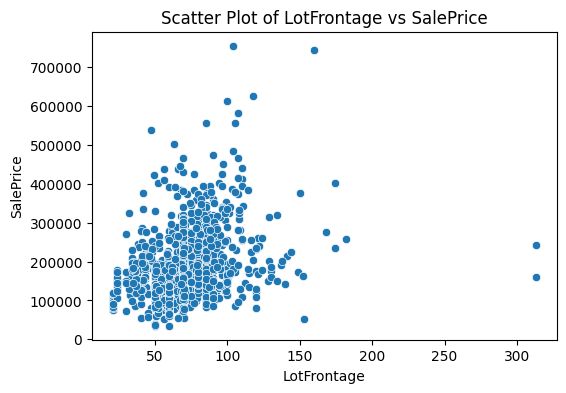

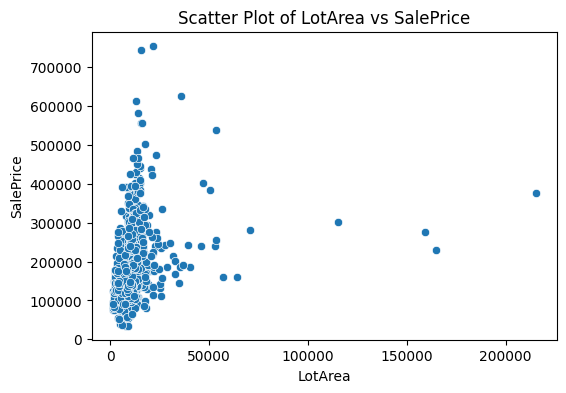

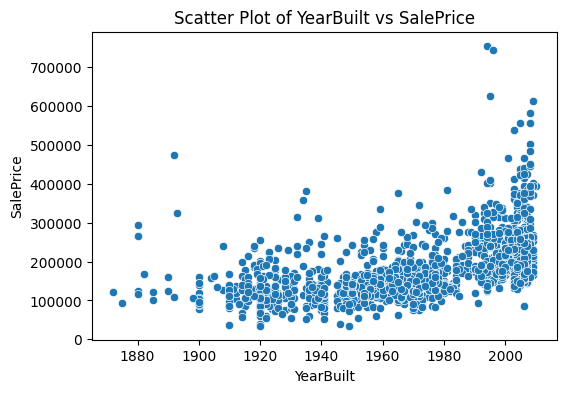

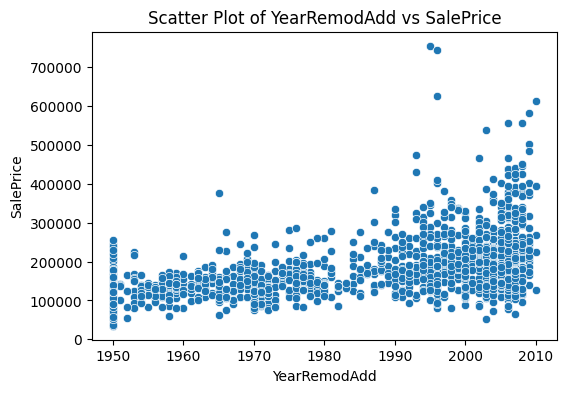

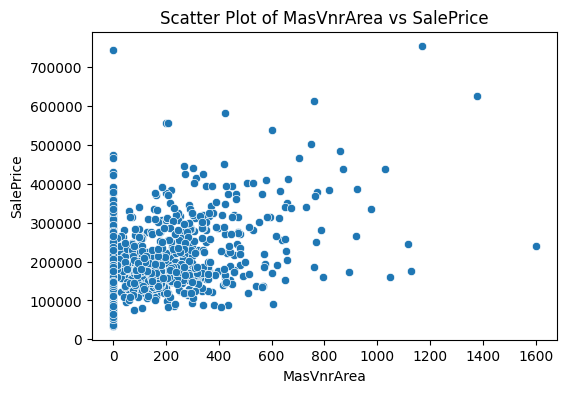

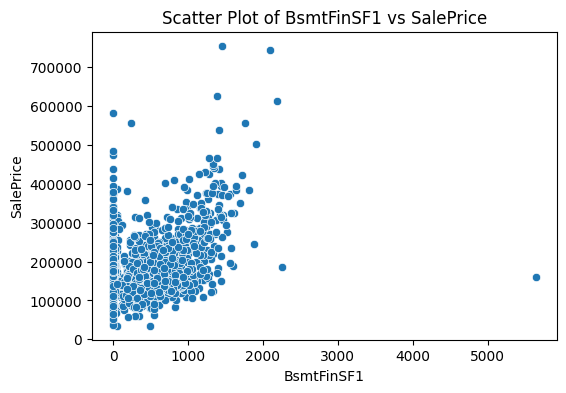

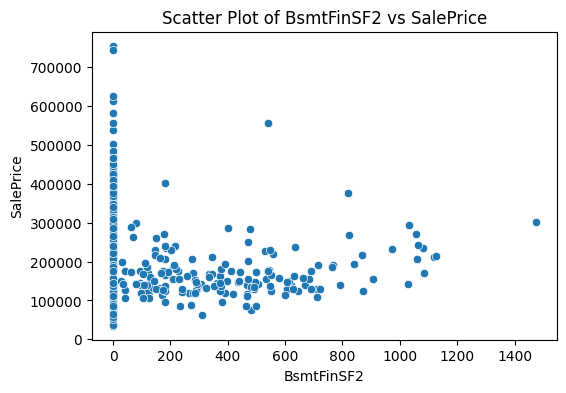

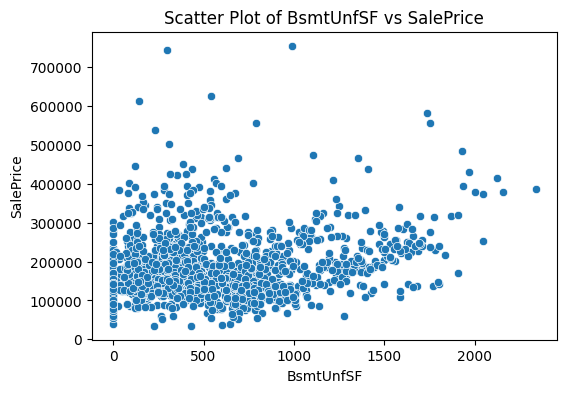

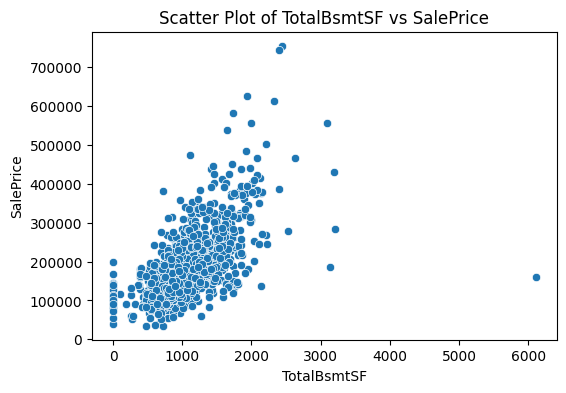

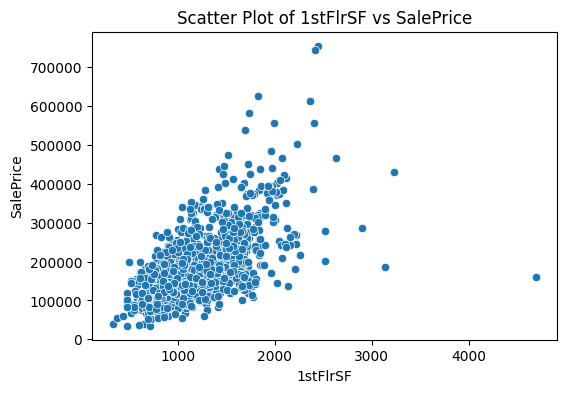

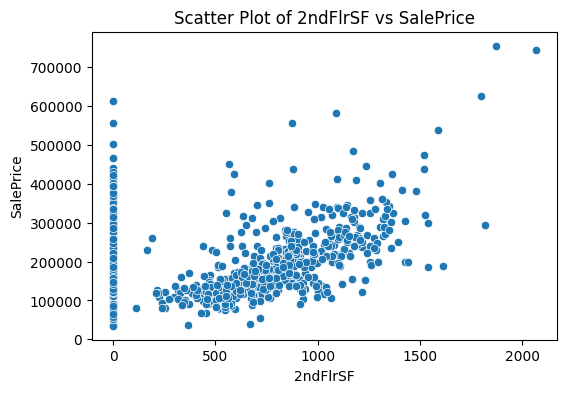

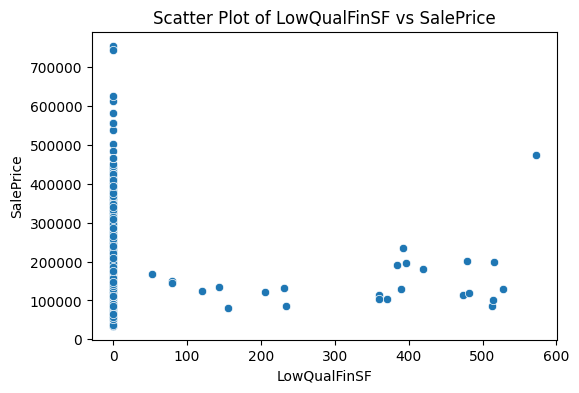

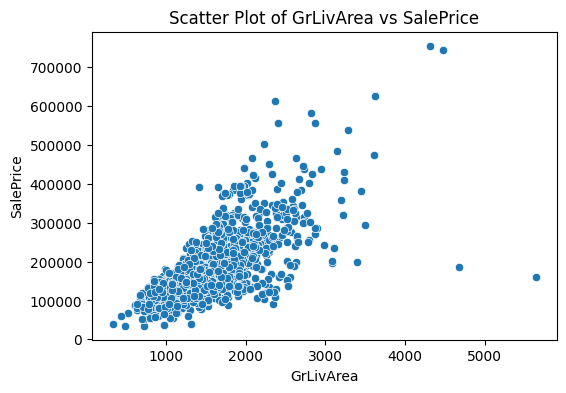

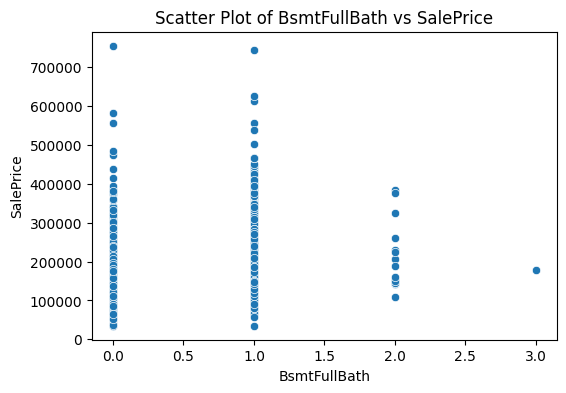

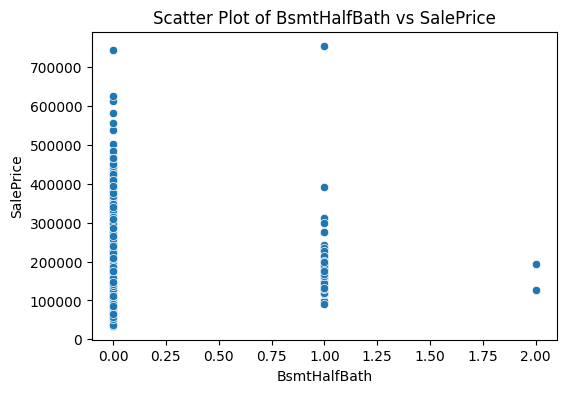

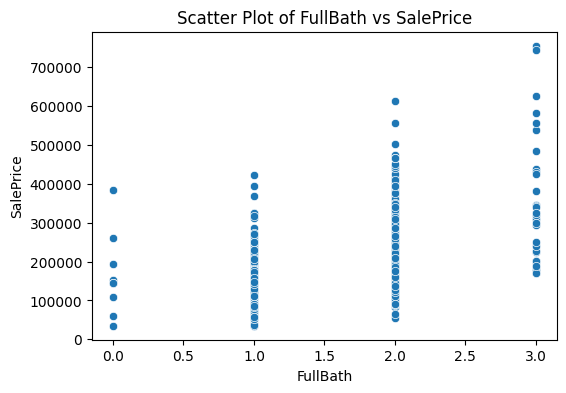

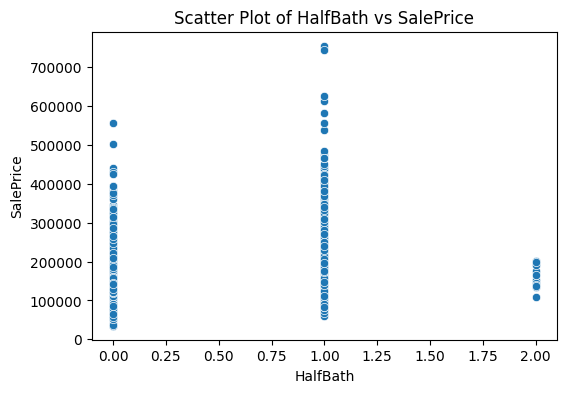

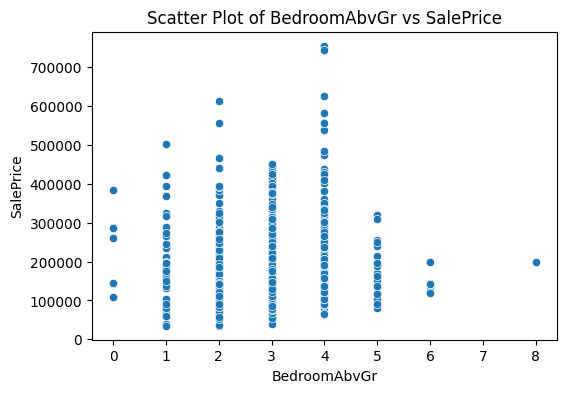

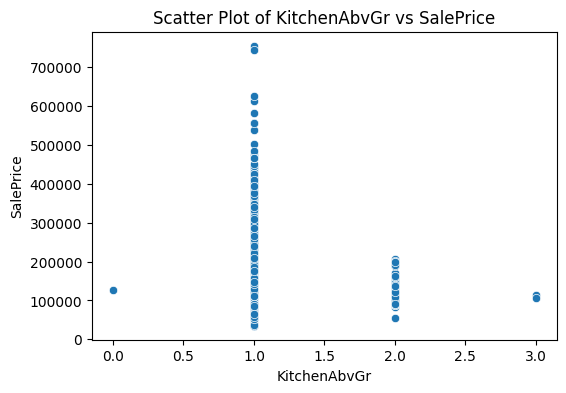

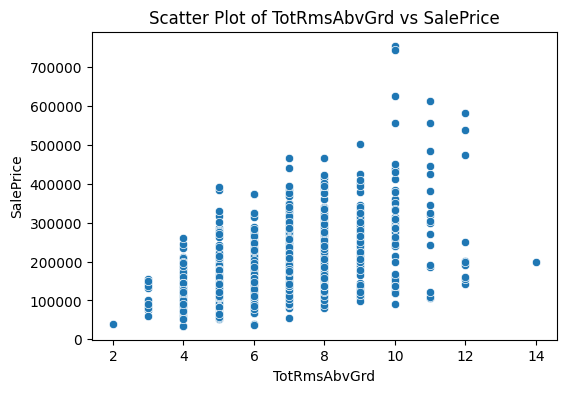

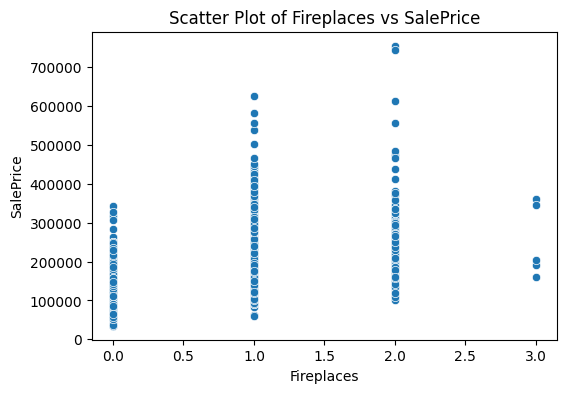

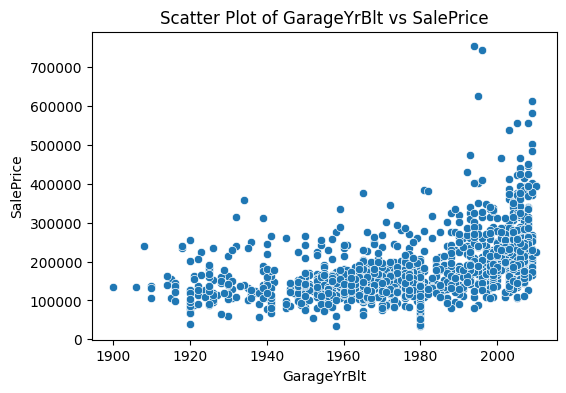

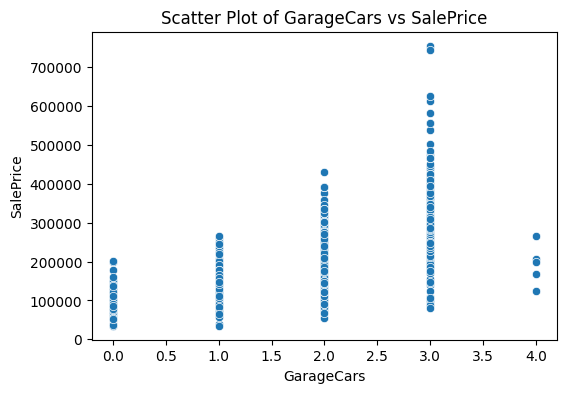

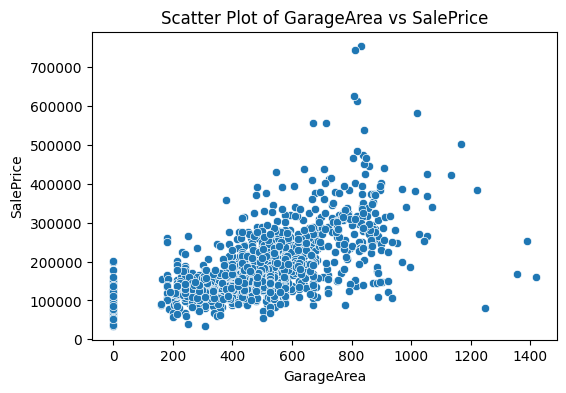

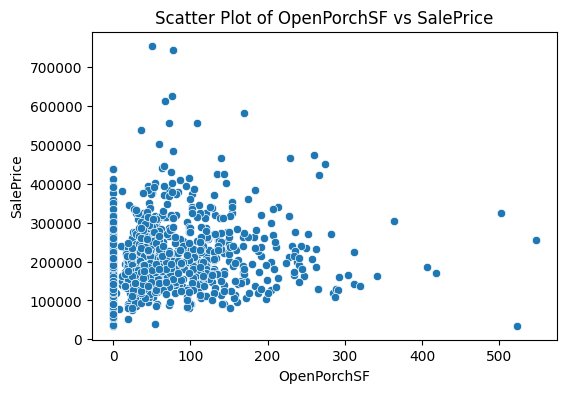

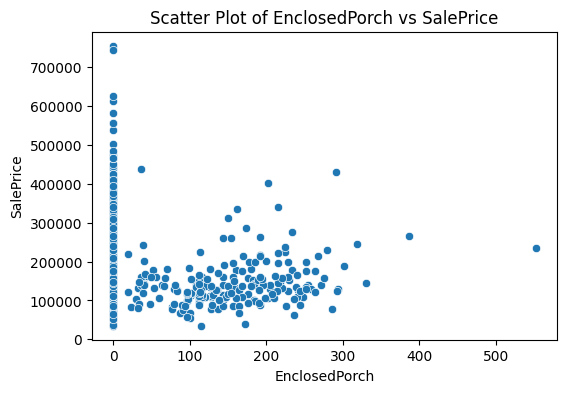

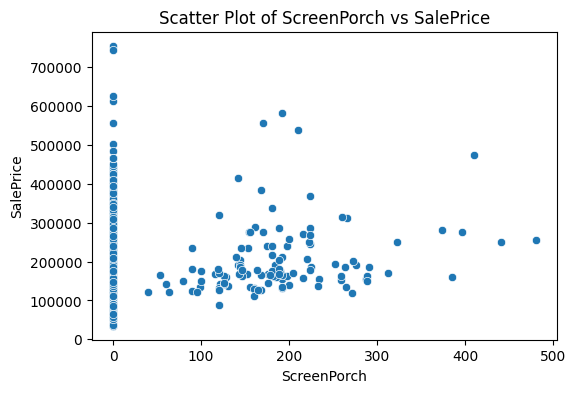

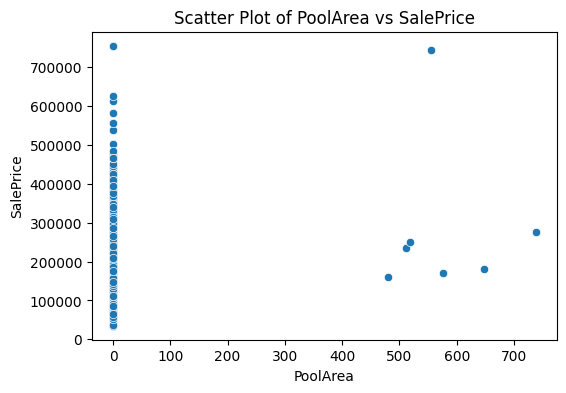

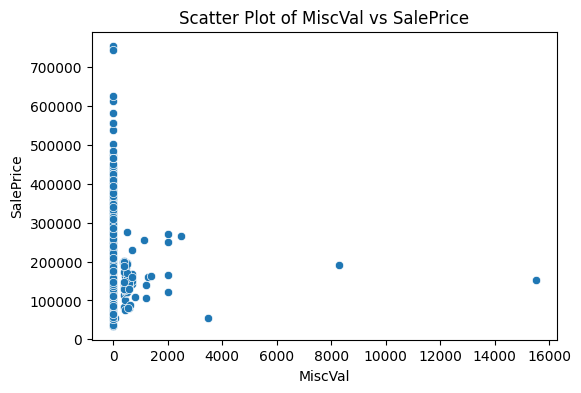

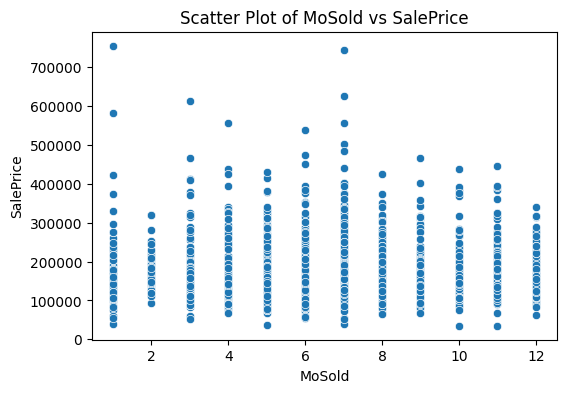

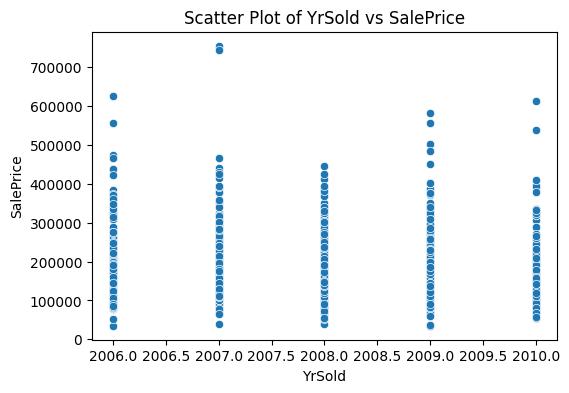

In [25]:
# Plotting the scatter plot for all the numerical columns
for col in num_cols:
    if col != 'SalePrice':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=cleaned_df, x=col, y='SalePrice')
        plt.title(f'Scatter Plot of {col} vs SalePrice')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.show()     

As per above observation, there are outlier the in the data

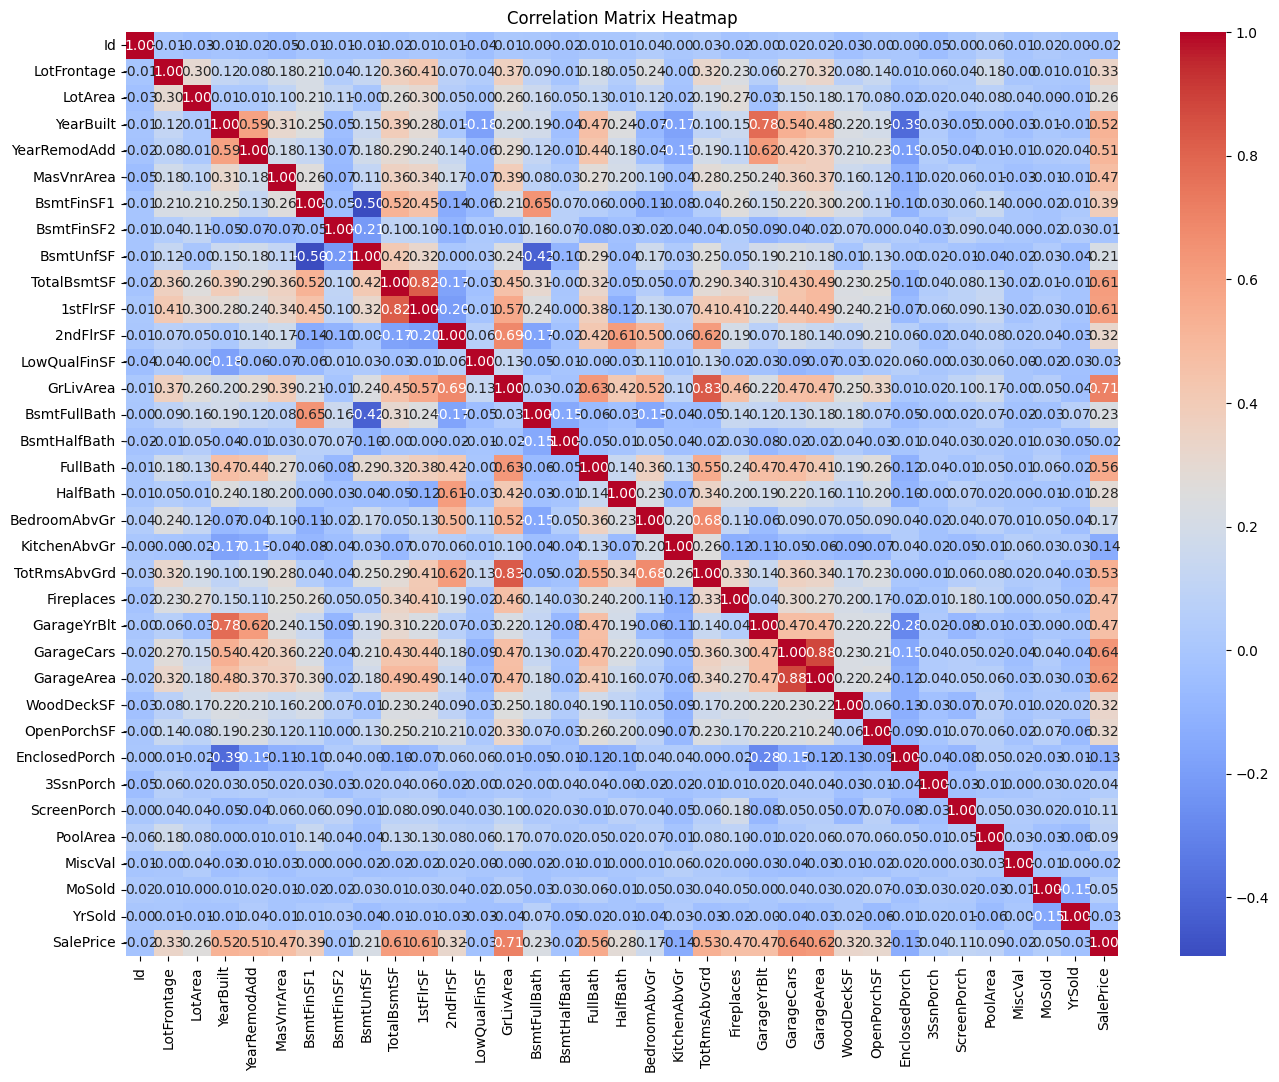

In [26]:
# Create the heat map or correlation matrix
plt.figure(figsize=(16, 12))
correlation_matrix = num_cols.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Plotting categorail Variable

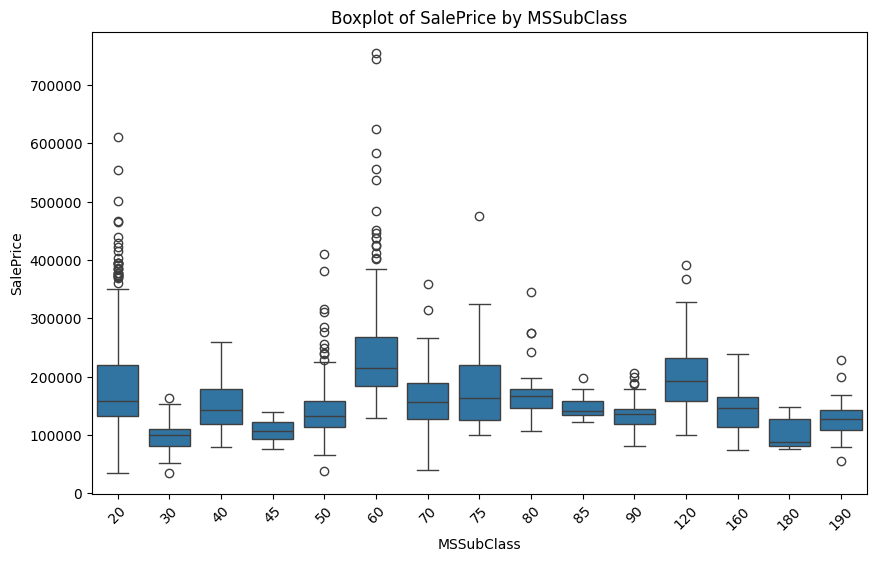

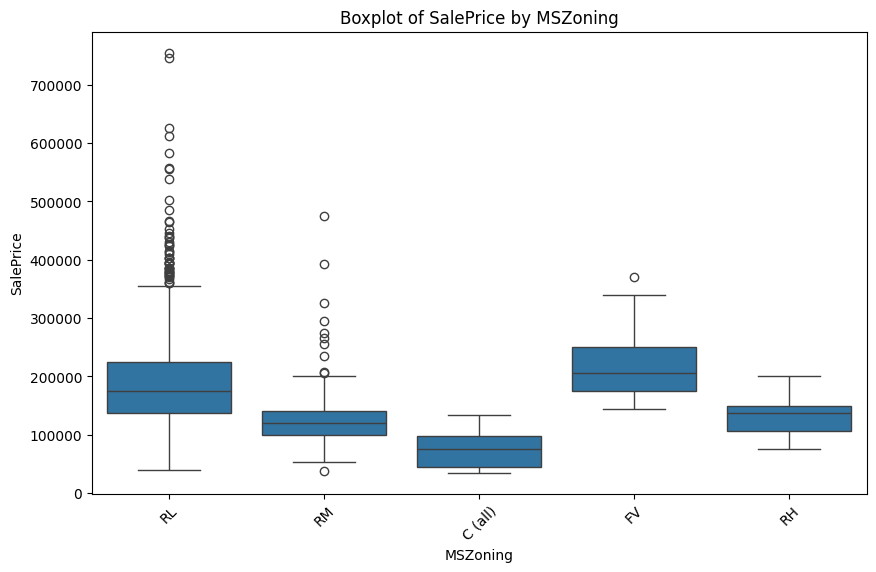

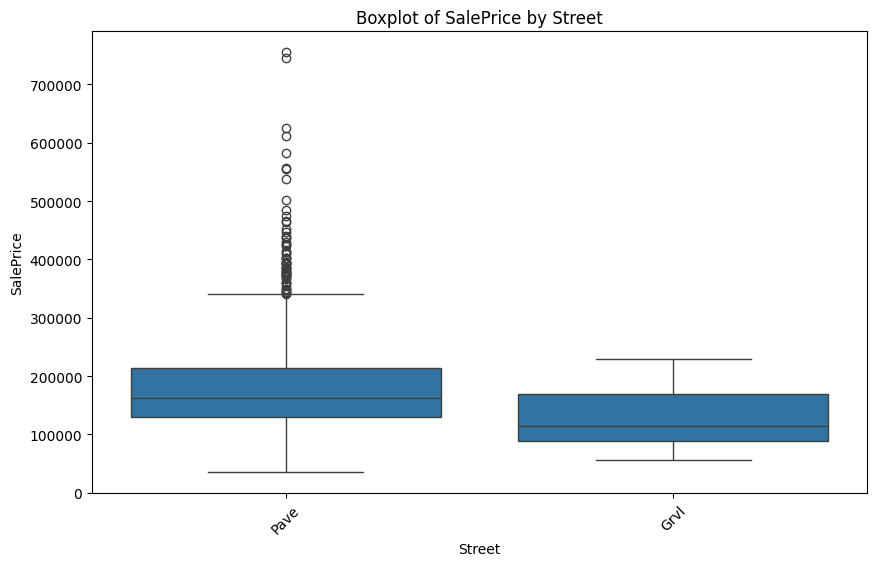

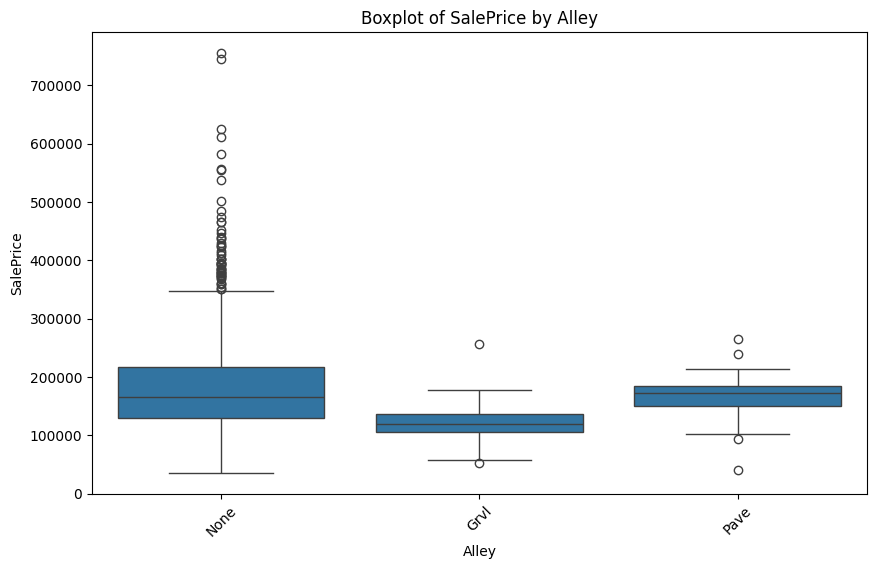

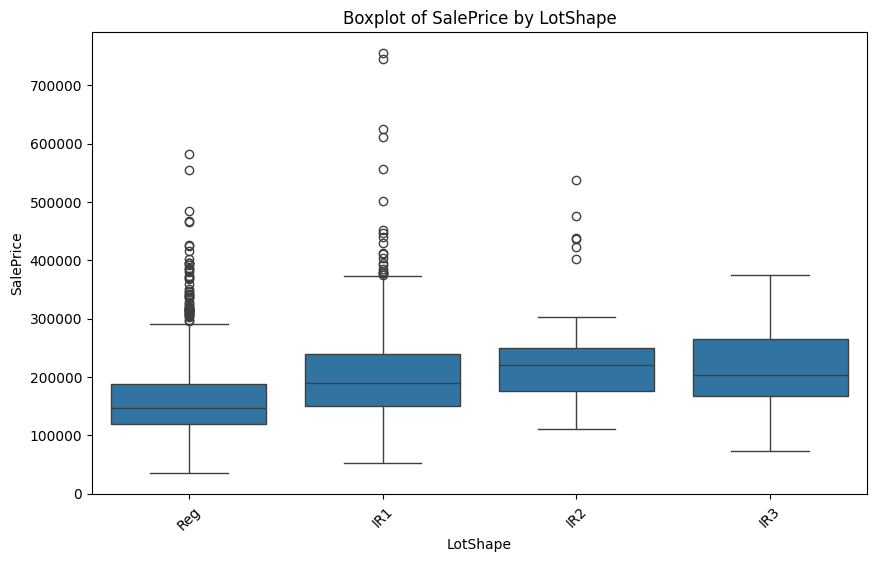

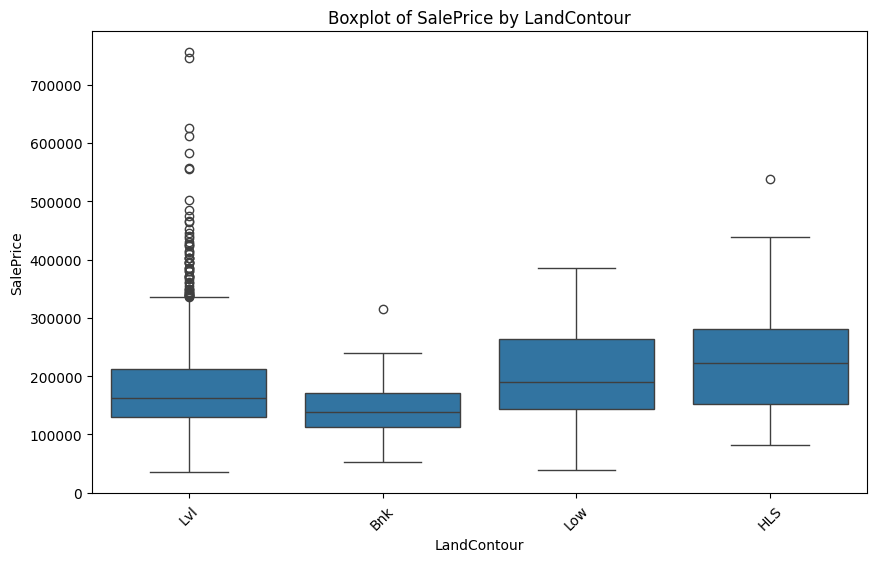

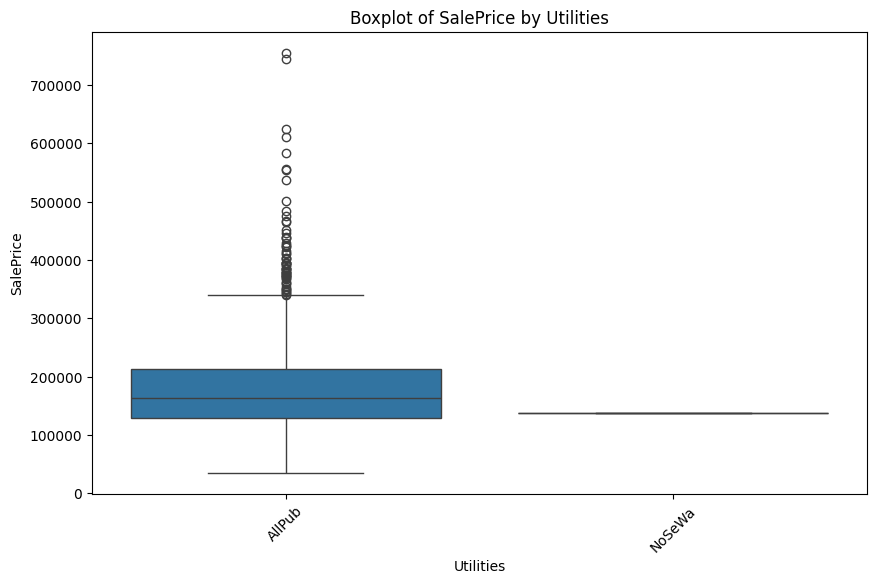

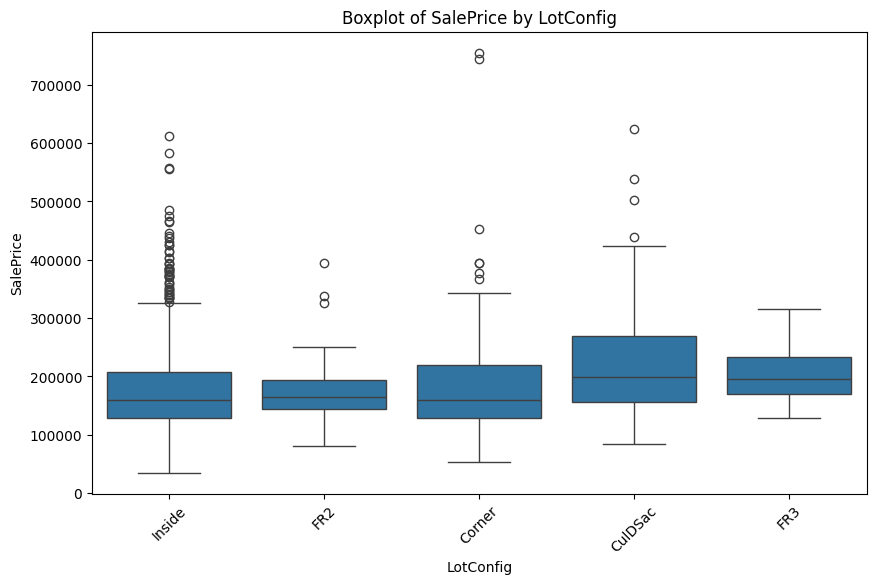

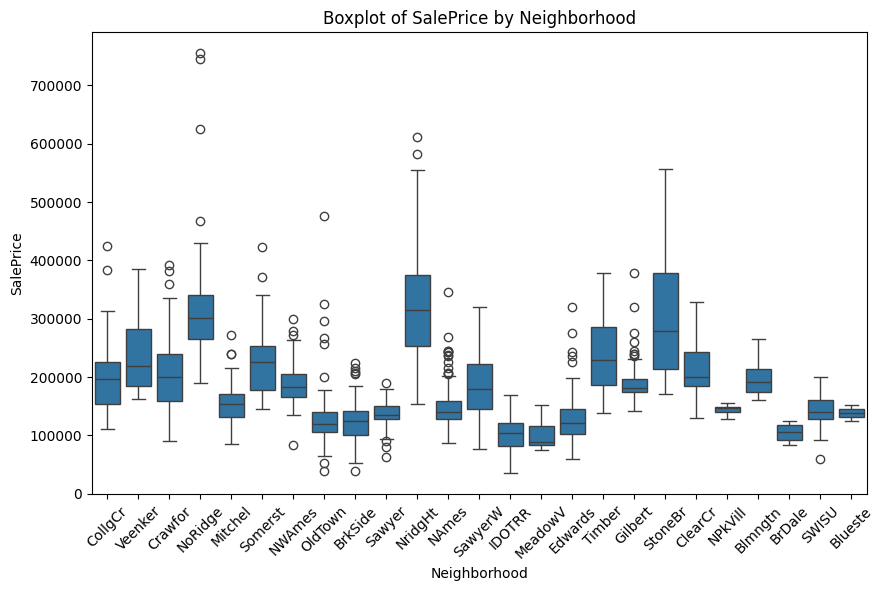

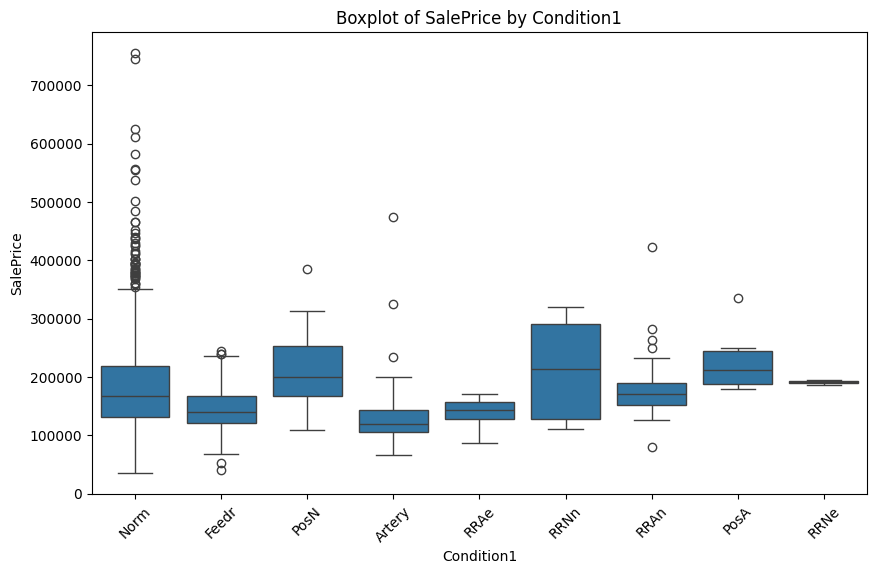

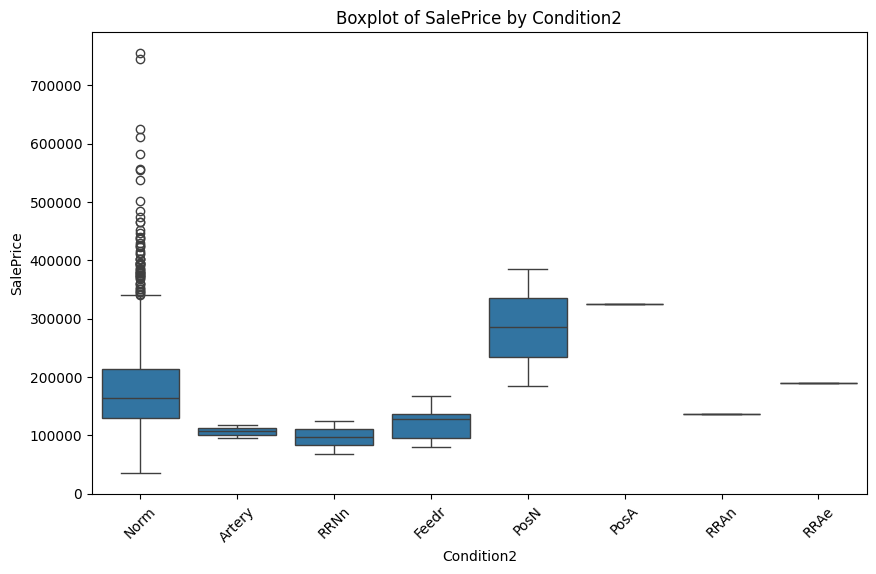

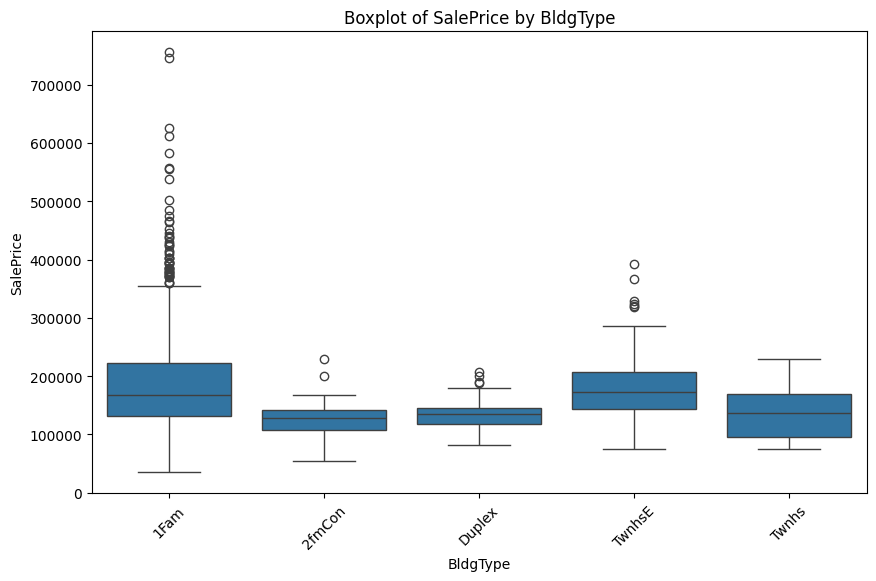

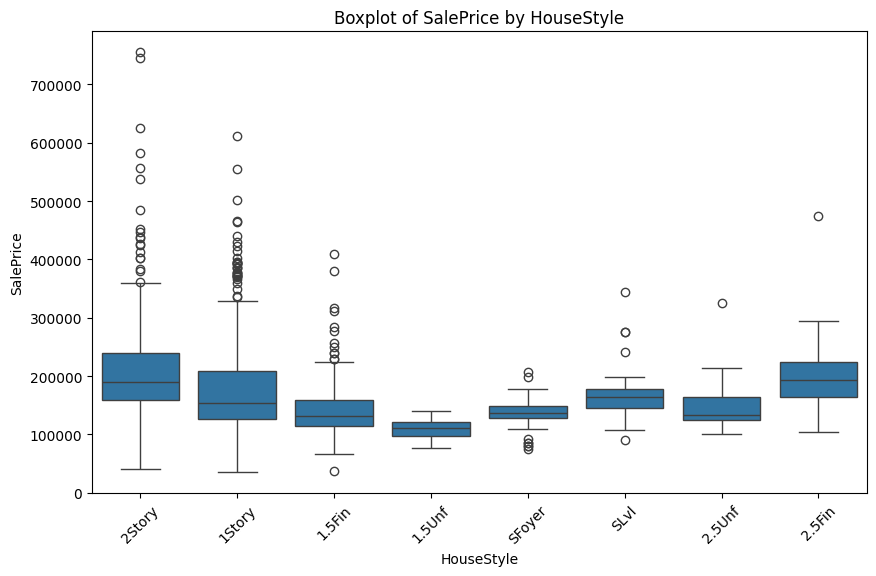

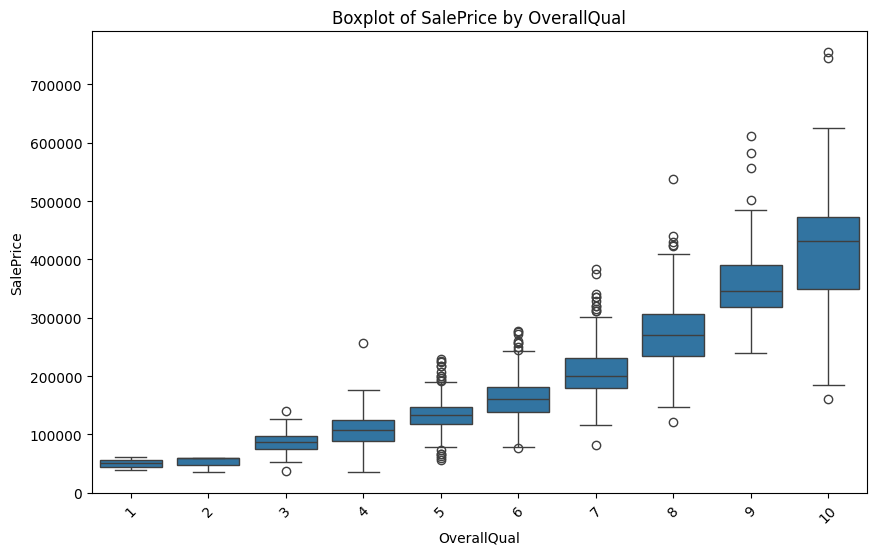

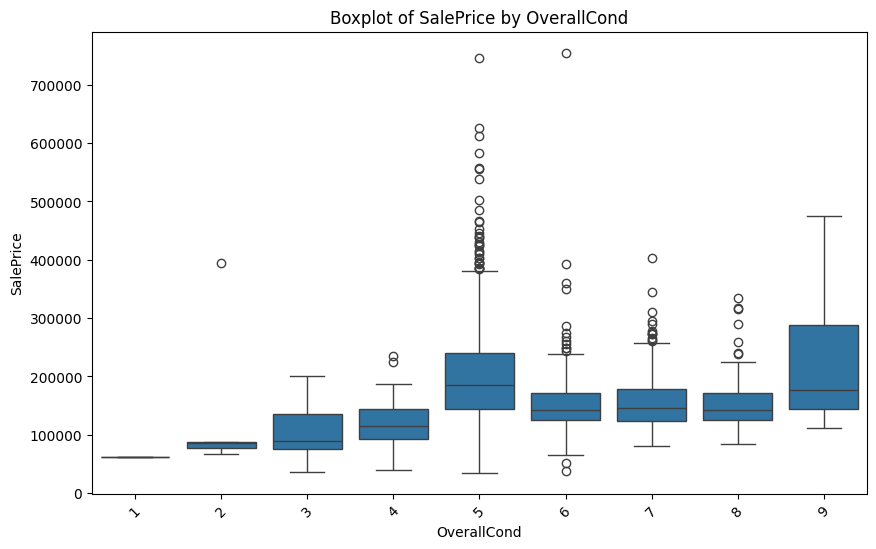

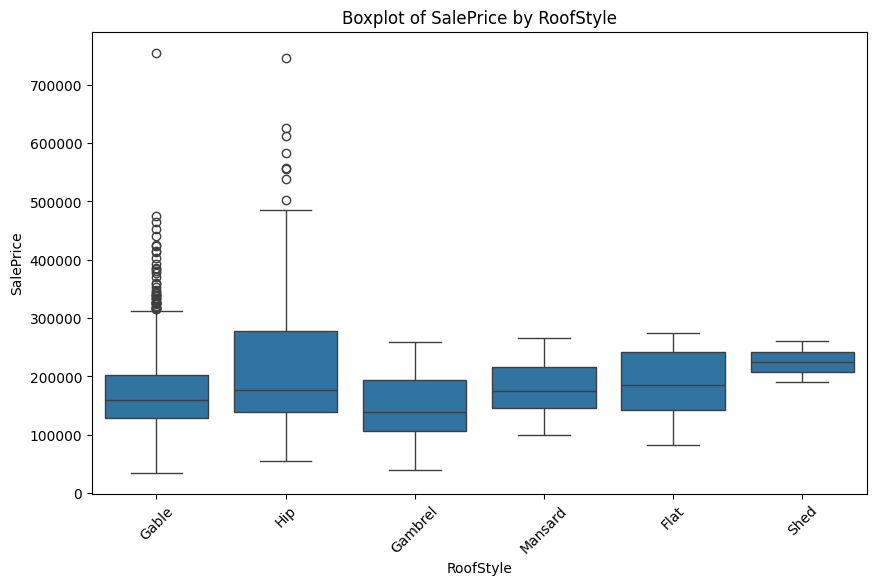

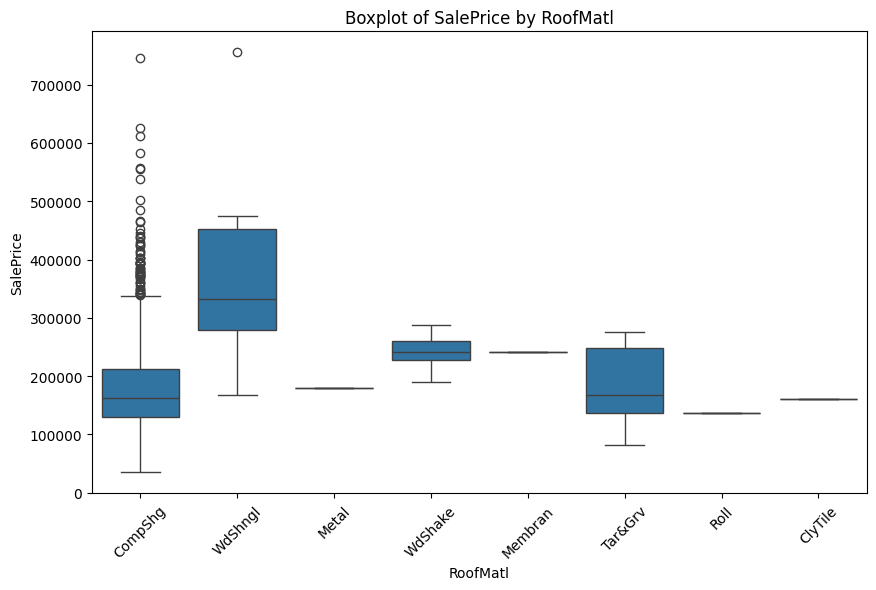

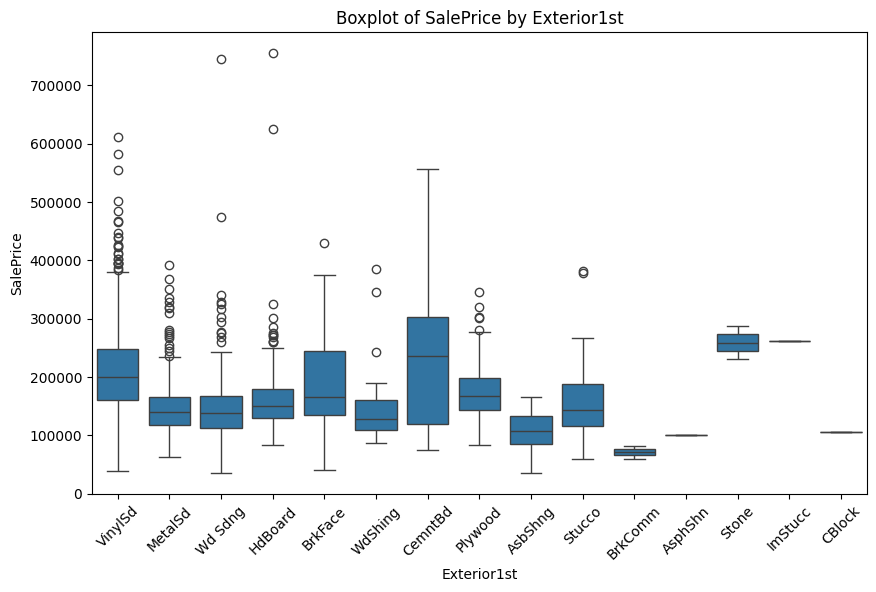

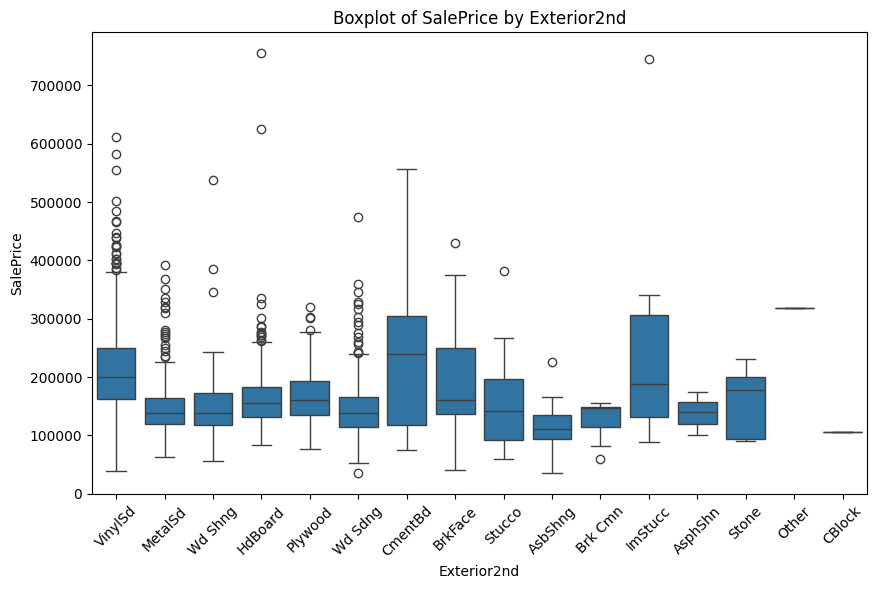

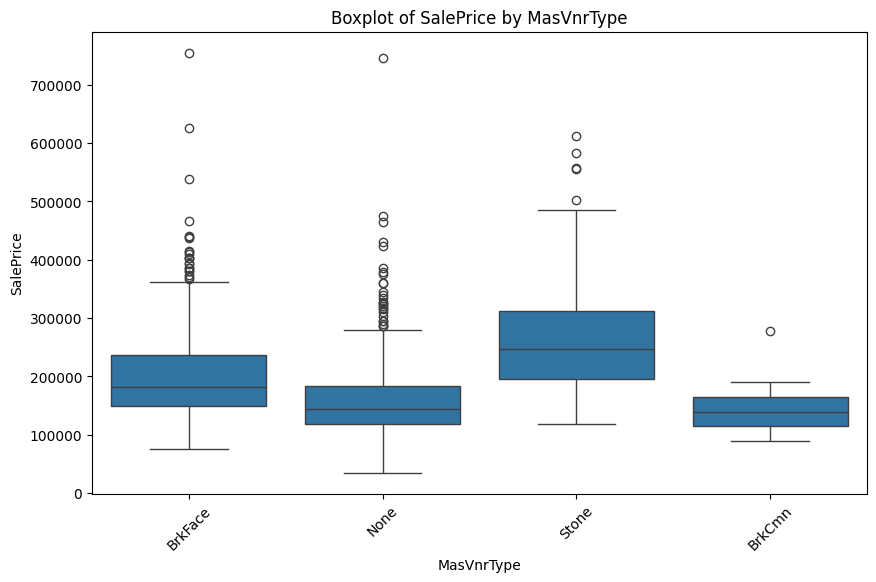

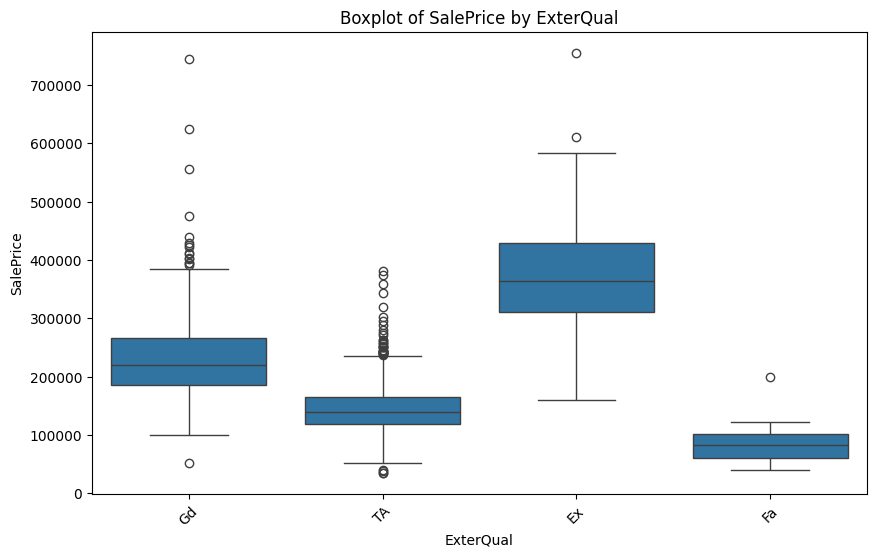

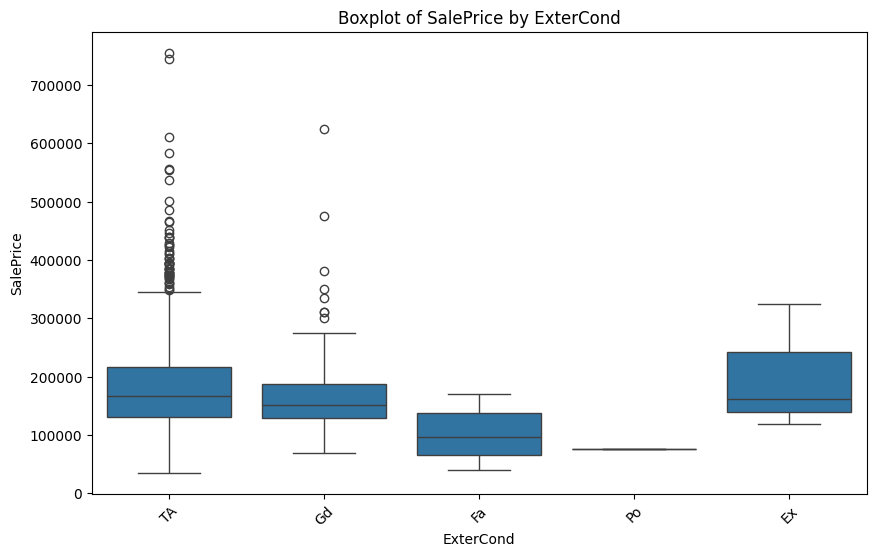

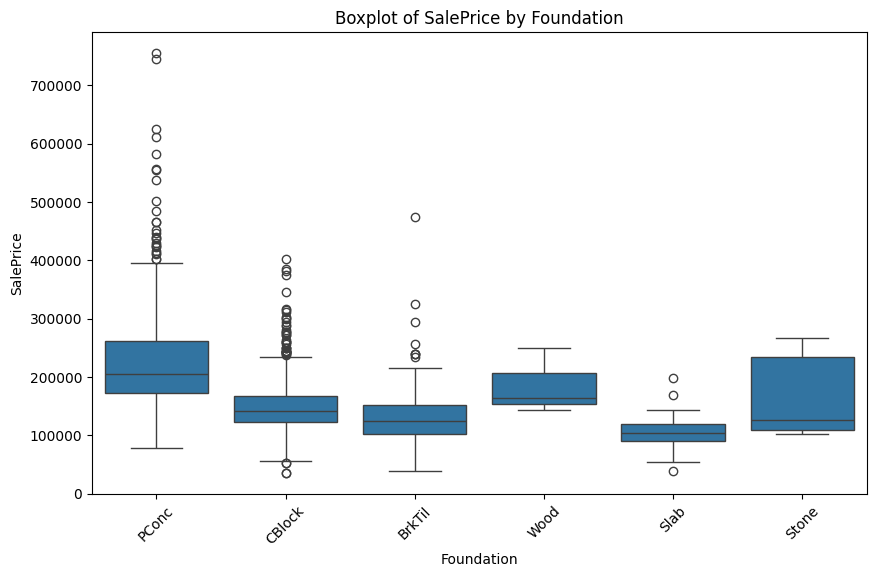

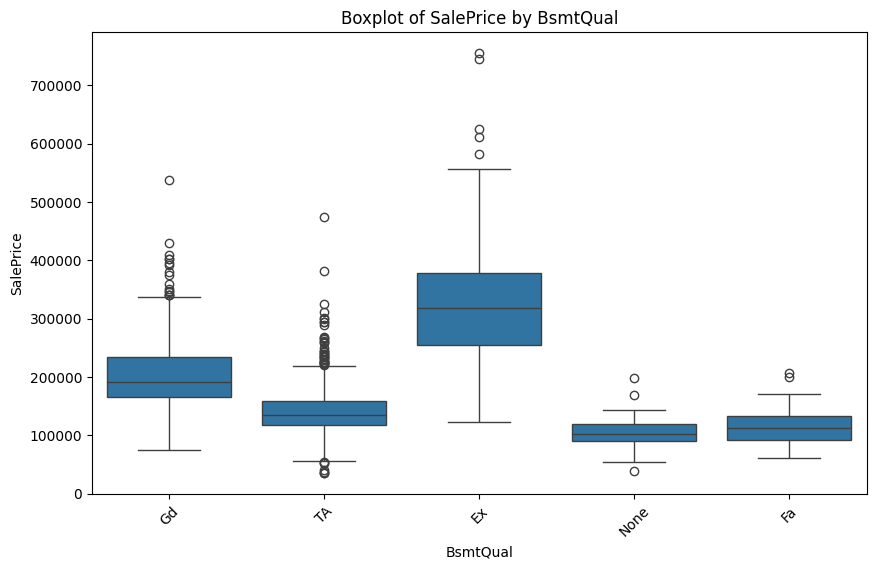

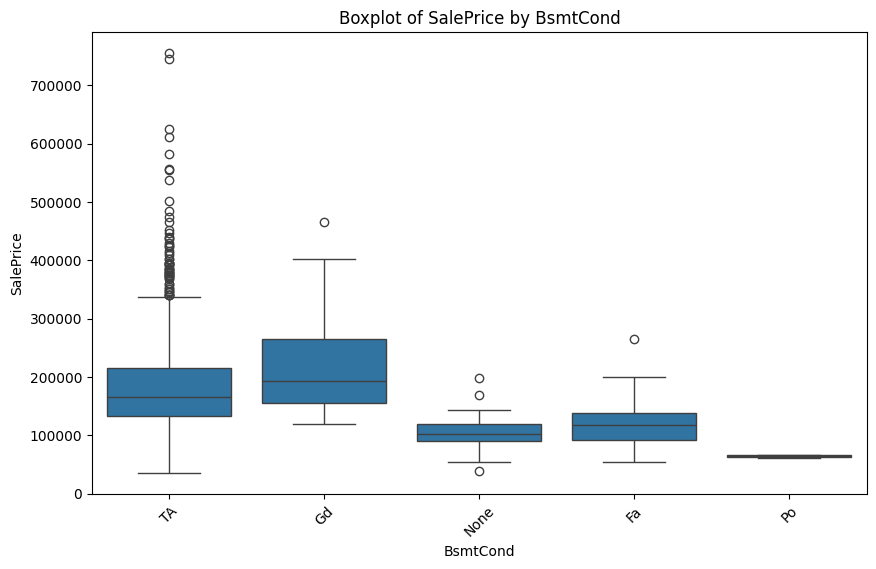

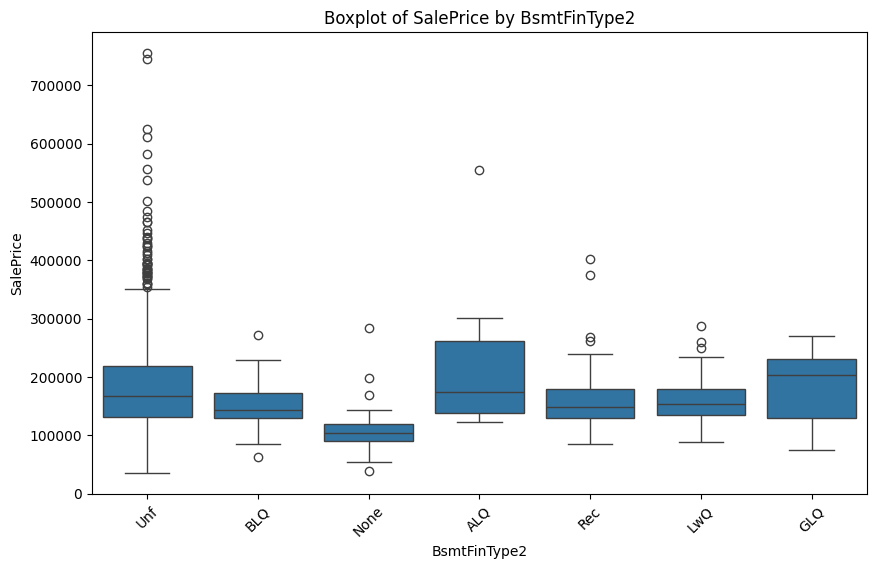

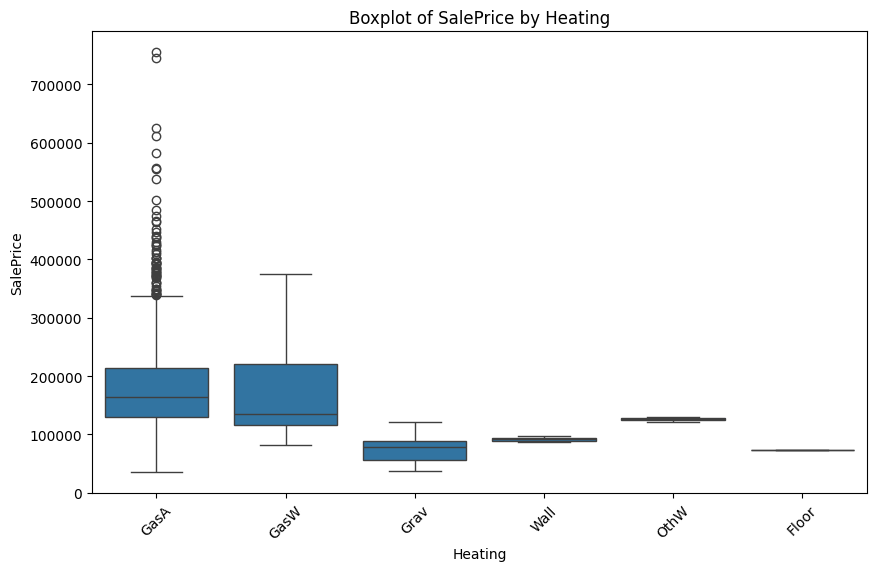

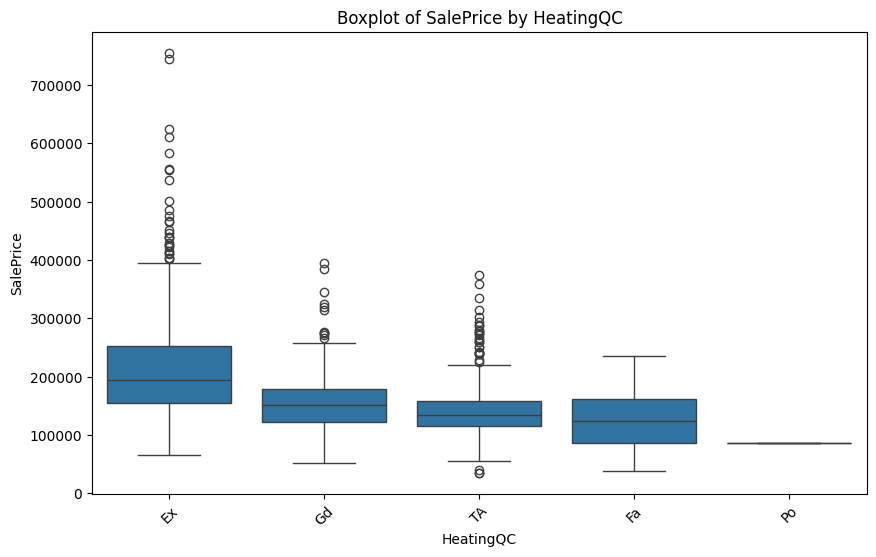

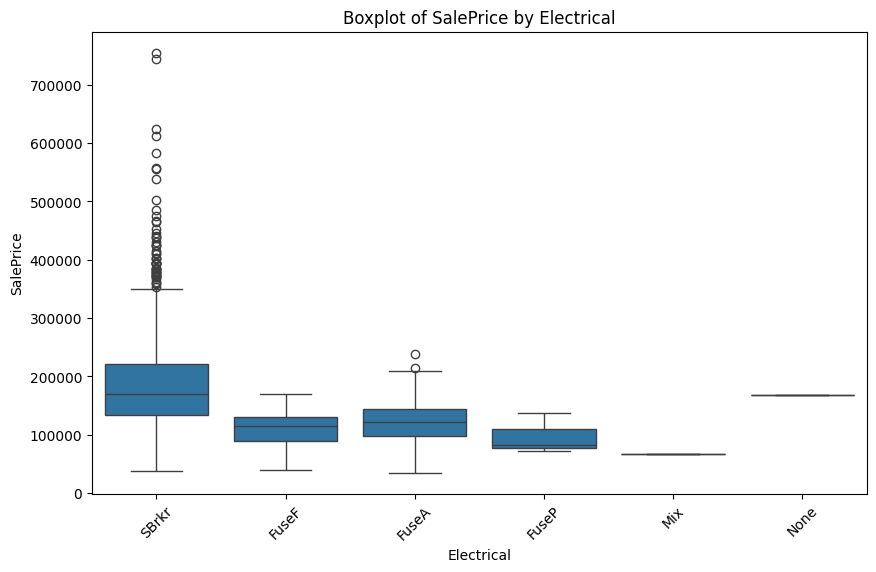

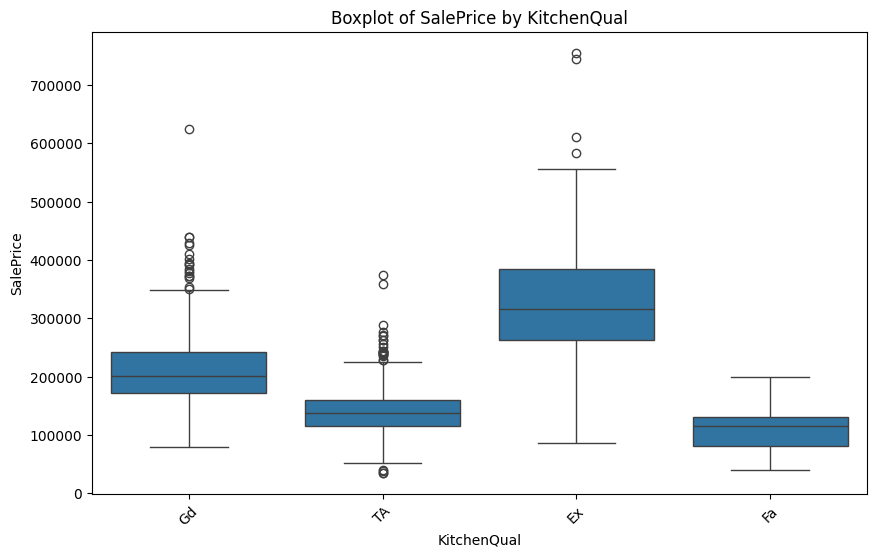

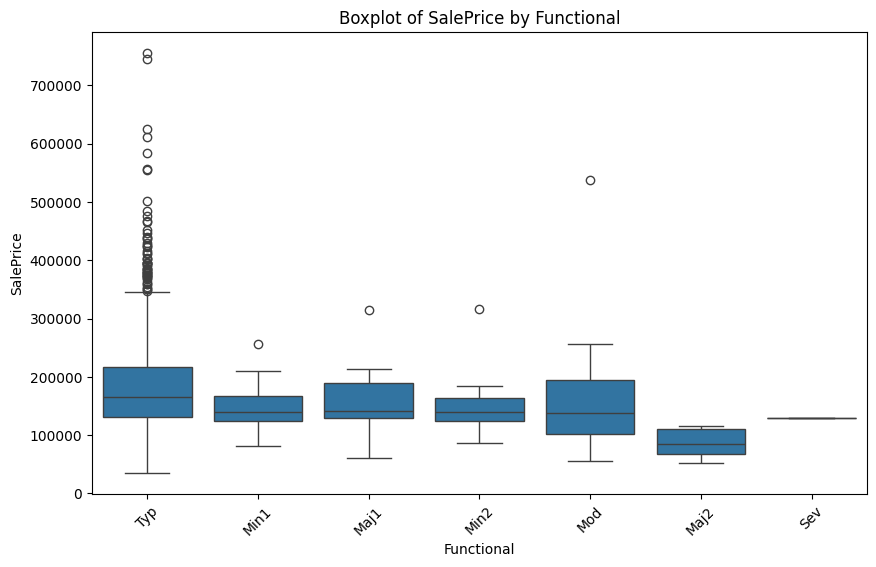

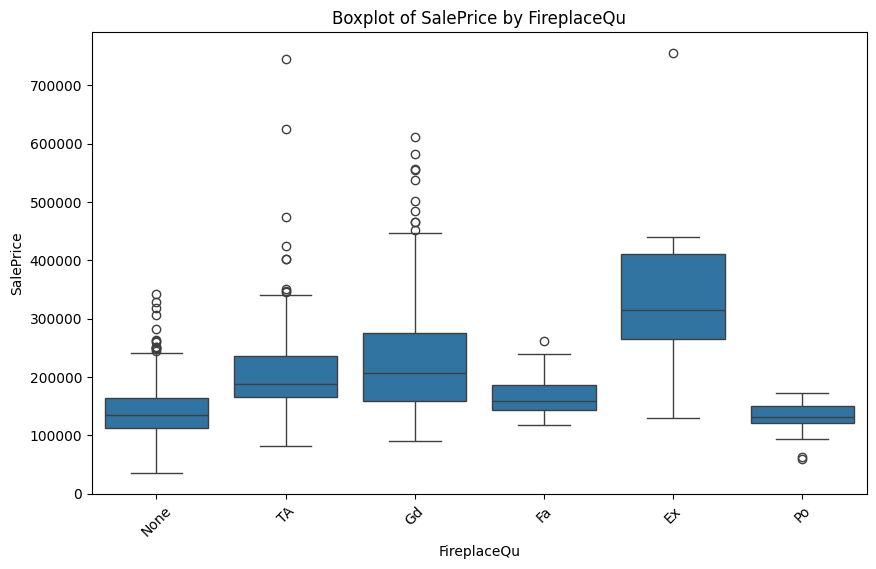

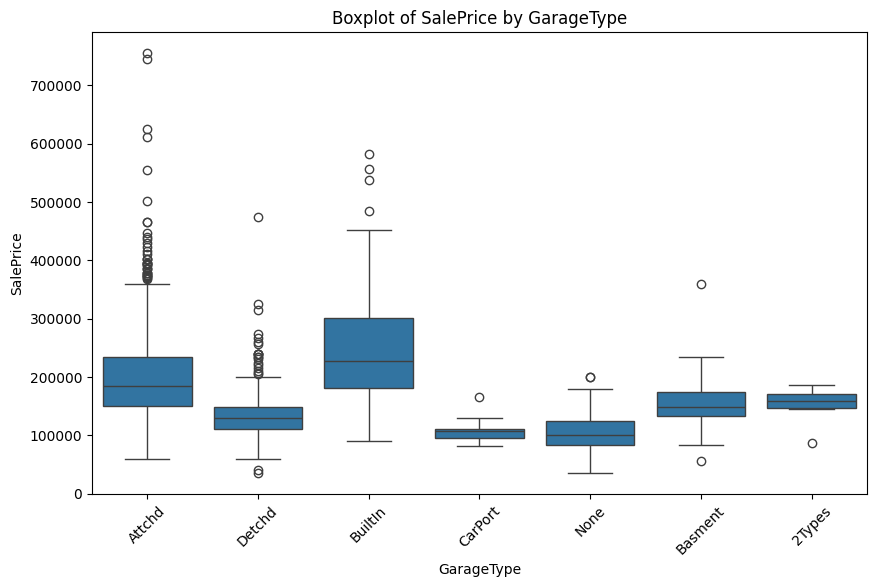

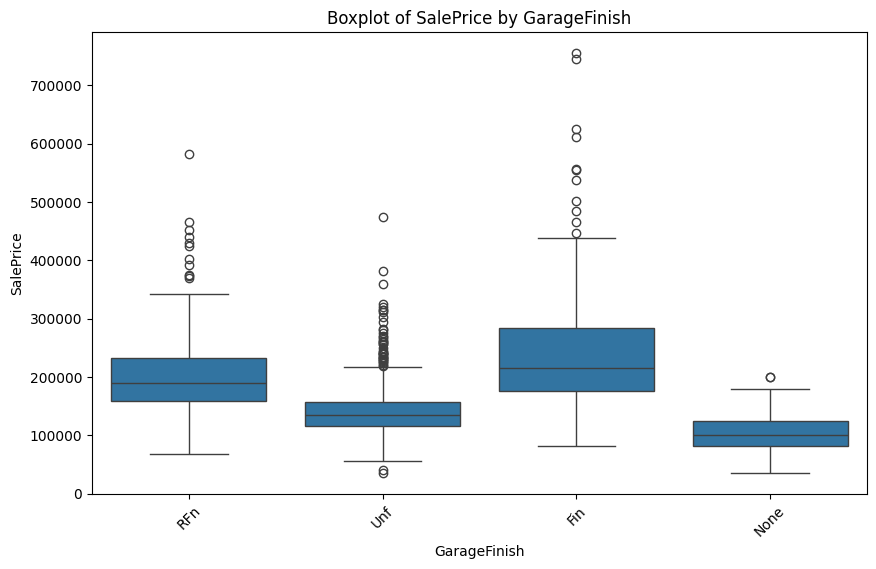

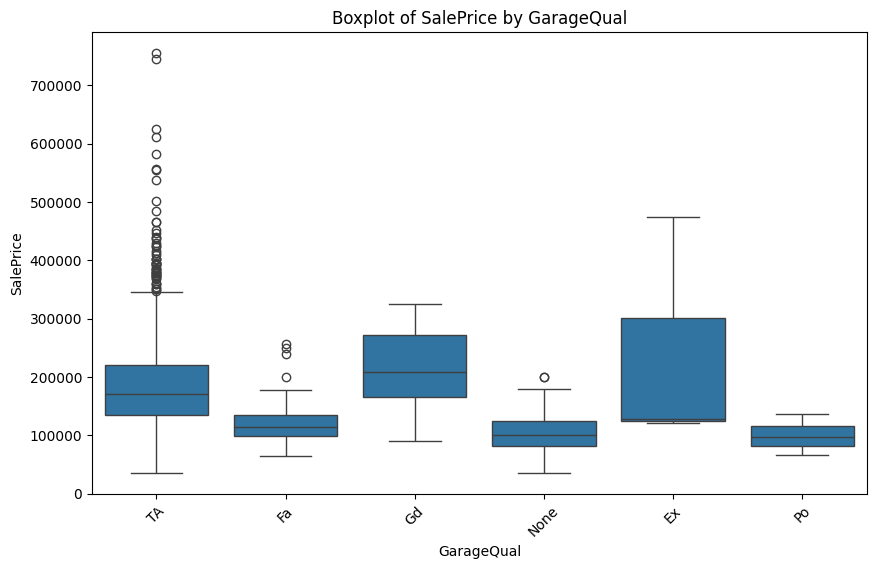

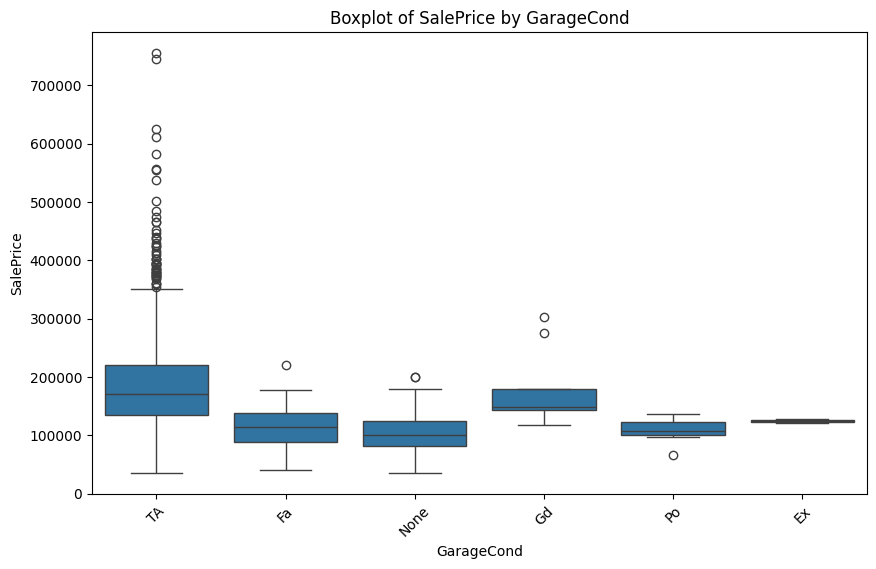

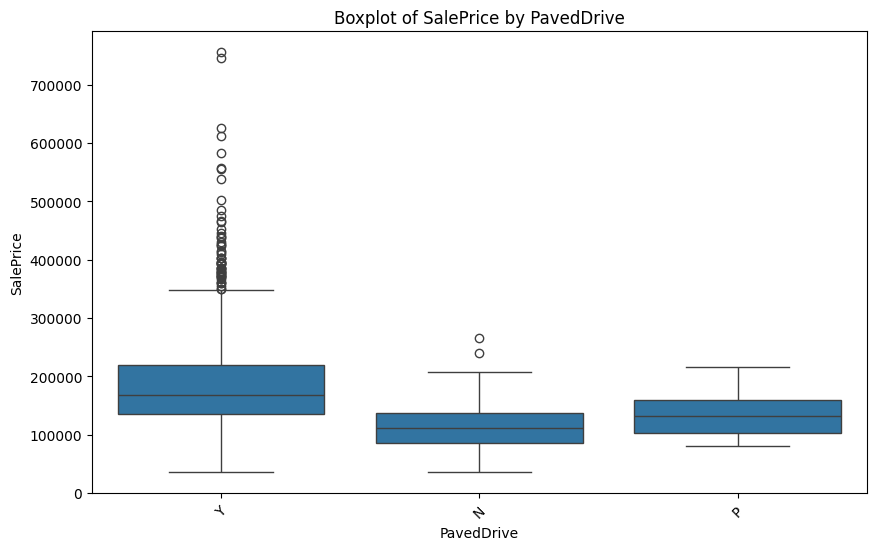

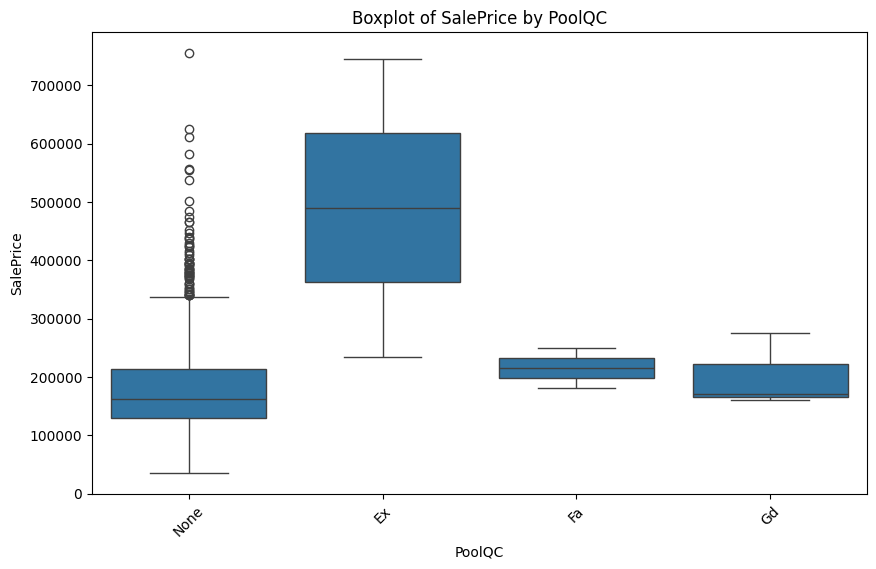

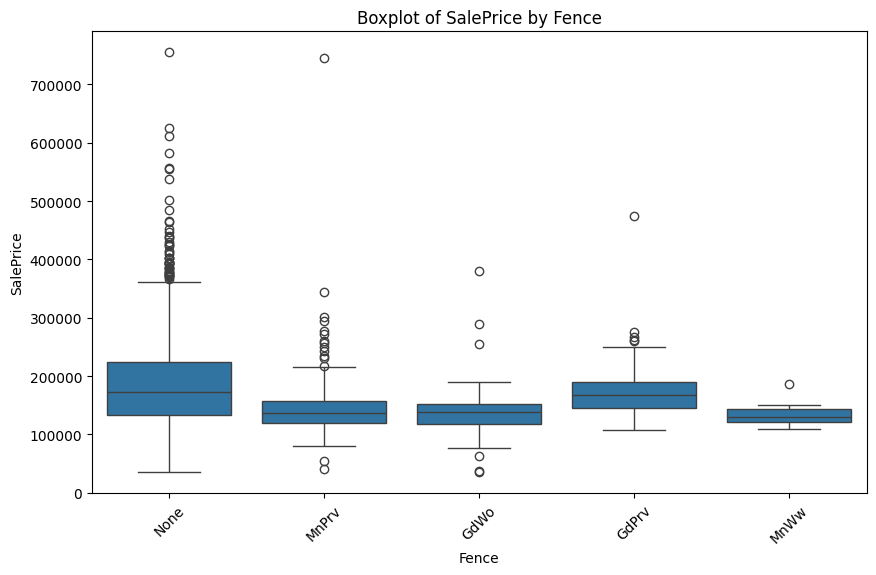

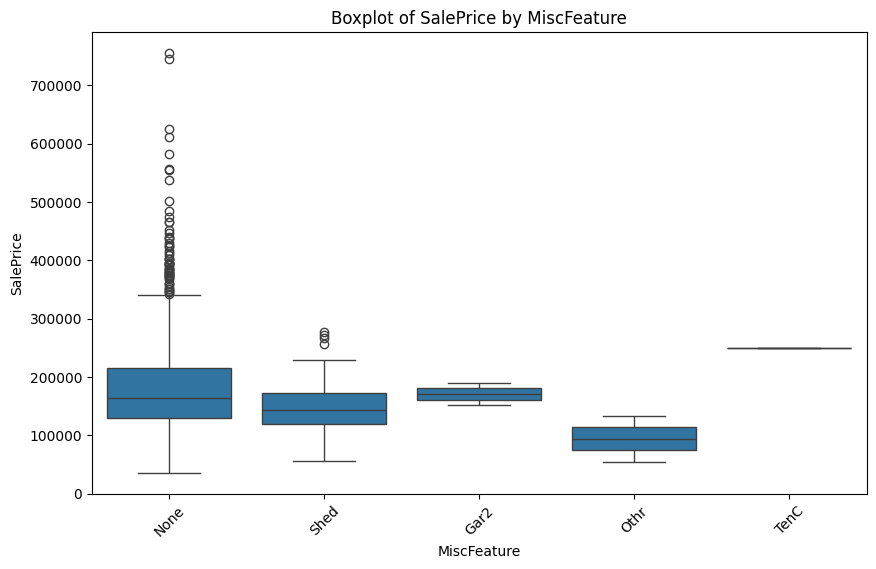

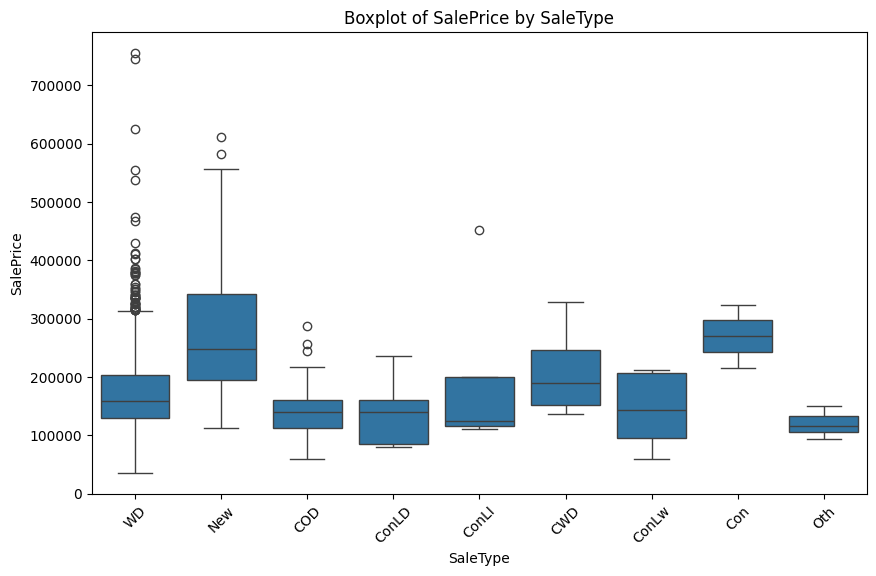

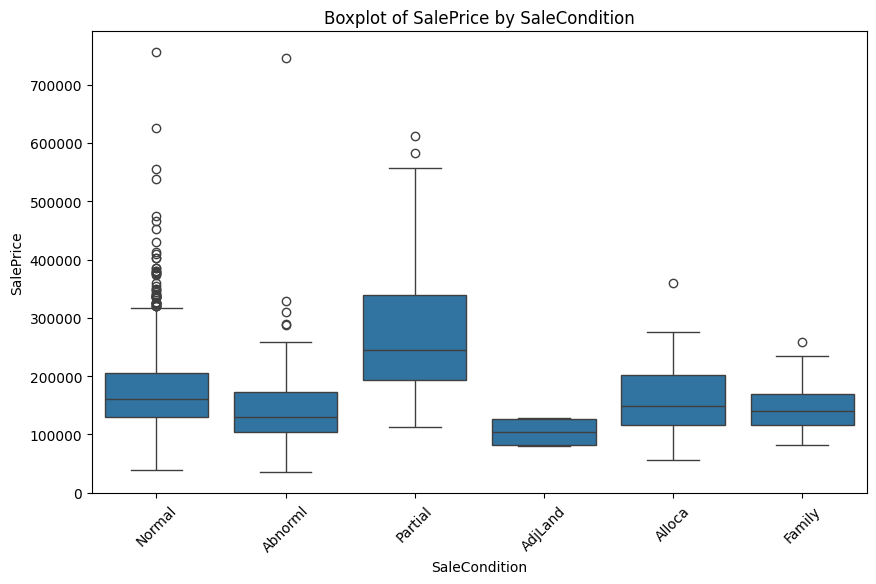

In [27]:
# Plotting categorial variables against SalePrice using boxplots
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cleaned_df, x=col, y='SalePrice')
    plt.title(f'Boxplot of SalePrice by {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()  

#### Creating Dummy Variables

In [28]:
# Creating Dummy Variables for Categorical Columns
df_with_dummies = pd.get_dummies(cat_cols, drop_first=True)
print("Shape of dataset after creating dummy variables:", df_with_dummies.shape)  
df_with_dummies.head()  

Shape of dataset after creating dummy variables: (1460, 255)


MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  Exterior2nd_ImStucc  Exterior2nd_MetalSd  Exterior2nd_Other  Exterior2nd_Plywood  Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  Foundation_CBlock  Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None  BsmtQual_TA  BsmtCond_Gd  BsmtCond_None  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_None  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_None  BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_None  BsmtFinType2_Rec  BsmtFinType2_Unf  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA  CentralAir_Y  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  Electrical_None  Electrical_SBrkr  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  Functional_Sev  Functional_Typ  FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_None  FireplaceQu_Po  FireplaceQu_TA  GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_None  GarageFinish_None  GarageFinish_RFn  GarageFinish_Unf  GarageQual_Fa  GarageQual_Gd  GarageQual_None  GarageQual_Po  GarageQual_TA  GarageCond_Fa  GarageCond_Gd  GarageCond_None  GarageCond_Po  GarageCond_TA  PavedDrive_P  PavedDrive_Y  PoolQC_

#### Outlier Treatment for Numeric Values

<Axes: >

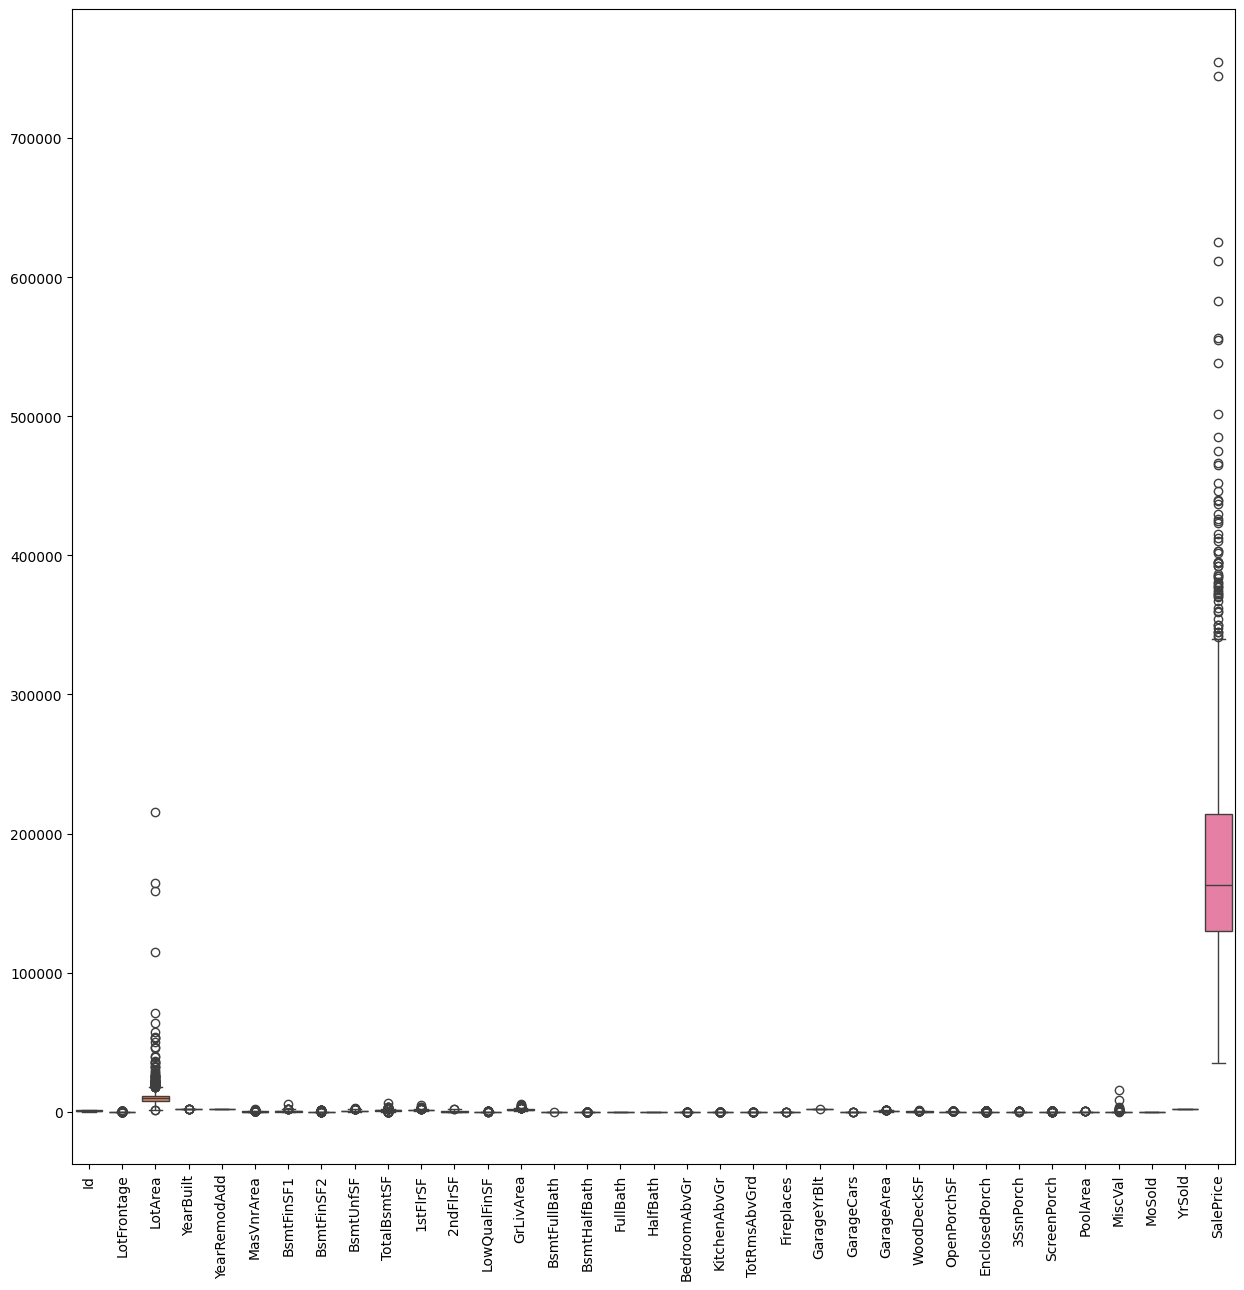

In [30]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=num_cols)

As per above, plot numeric variable has outlier, which need to be treated. Same for target varible as well.

In [31]:
# Outlier treatment using IQR method for numerical columns
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1   
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in num_cols.columns:
    num_cols = num_cols[(num_cols[col] >= lower_bound[col]) & (num_cols[col] <= upper_bound[col])] 


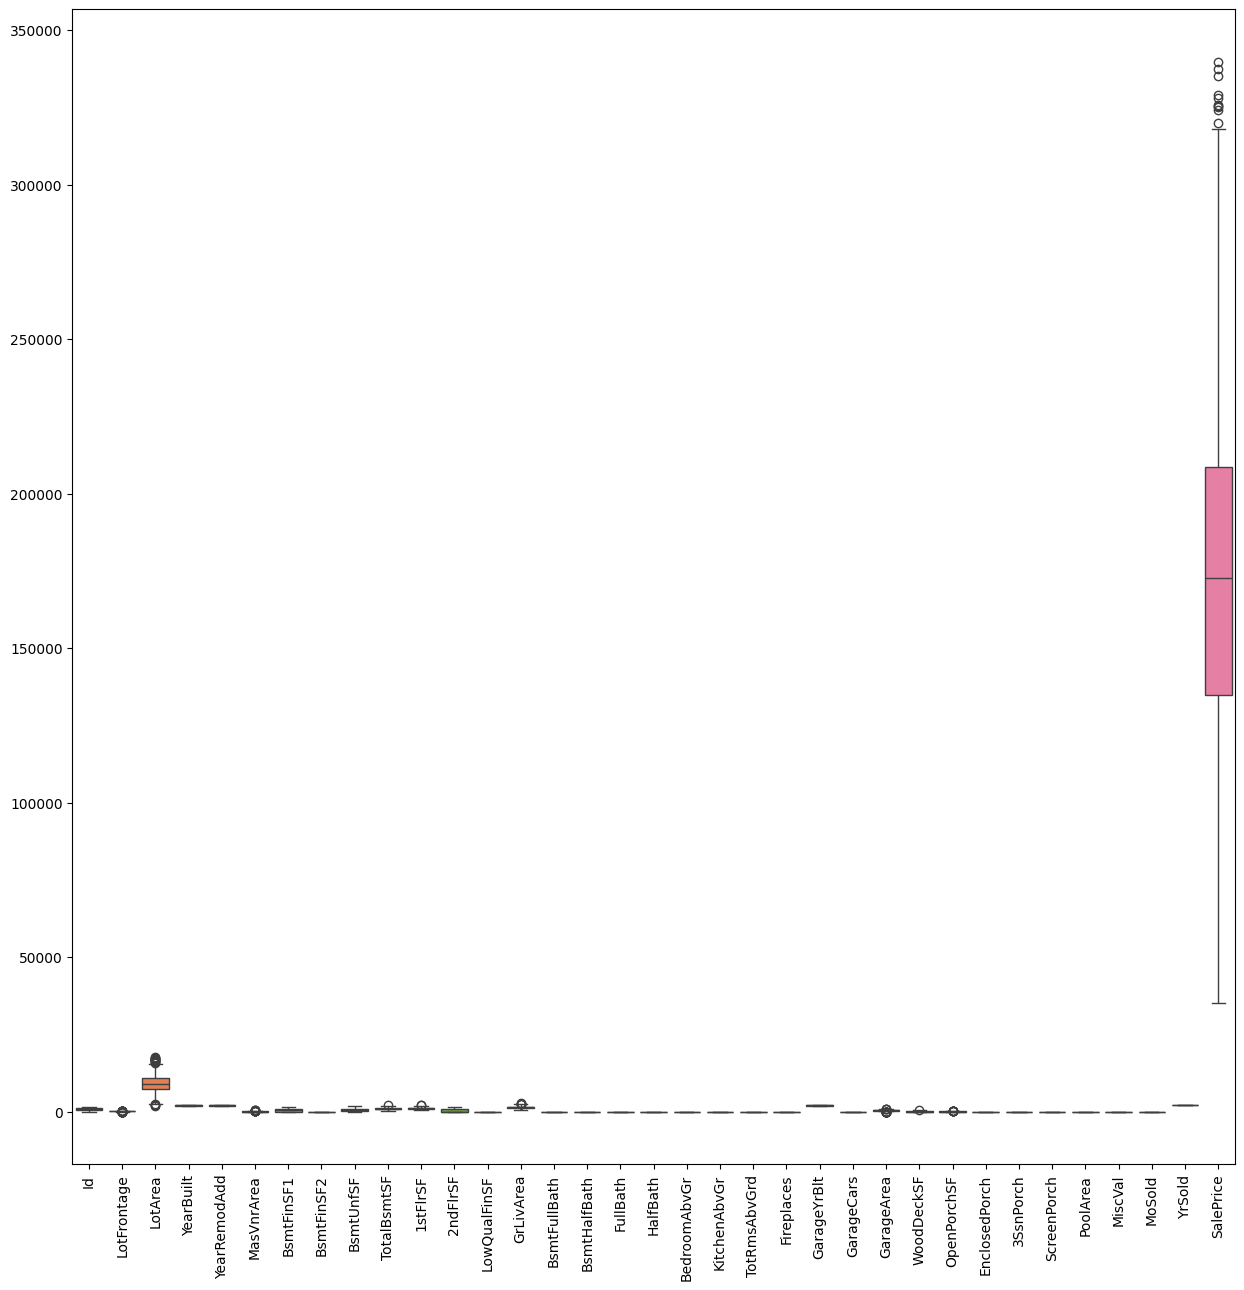

In [32]:
## Check the boxplots post outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=num_cols);

After outlier treament the above plots looks better as compare to before.

In [33]:
# Combine numerical and dummy variable dataframes for further analysis
final_df = pd.concat([num_cols, df_with_dummies], axis=1)
# Drop rows with NaNs from index misalignment and reset index
final_df = final_df.dropna().reset_index(drop=True)
print("Shape of the final dataset after outlier treatment and dummy variable creation:", final_df.shape)
final_df.head()

Shape of the final dataset after outlier treatment and dummy variable creation: (613, 290)


Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  Exterior2nd_ImStucc  Exterior2nd_MetalSd  Exterior2nd_Other  Exterior2nd_Plywood  Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  Foundation_CBlock  Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None  BsmtQual_TA  BsmtCond_Gd  BsmtCond_None  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_None  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_None  BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_None  BsmtFinType2_Rec  BsmtFinType2_Unf  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA  CentralAir_Y  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  Electrical_None  Electrical_SBrkr  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  Functional_Sev  Functional_Typ  FireplaceQu_Fa  FireplaceQu_Gd  Fire

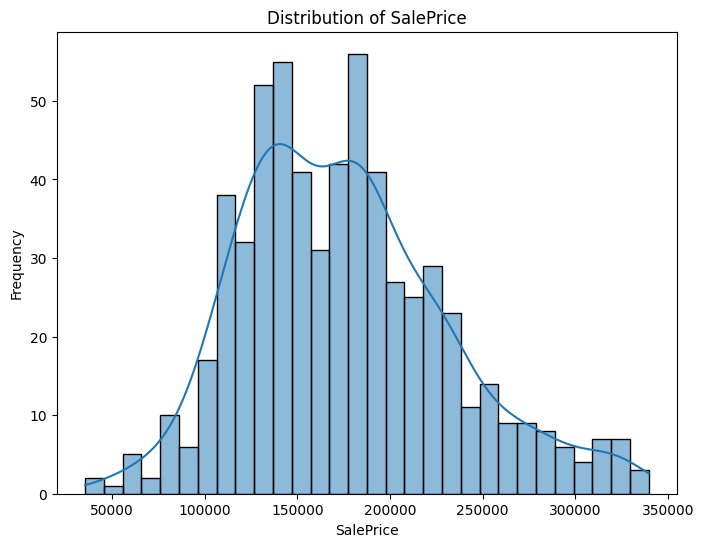

In [34]:
# Plotting the target variable SalePrice distribution
plt.figure(figsize=(8, 6))
sns.histplot(final_df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

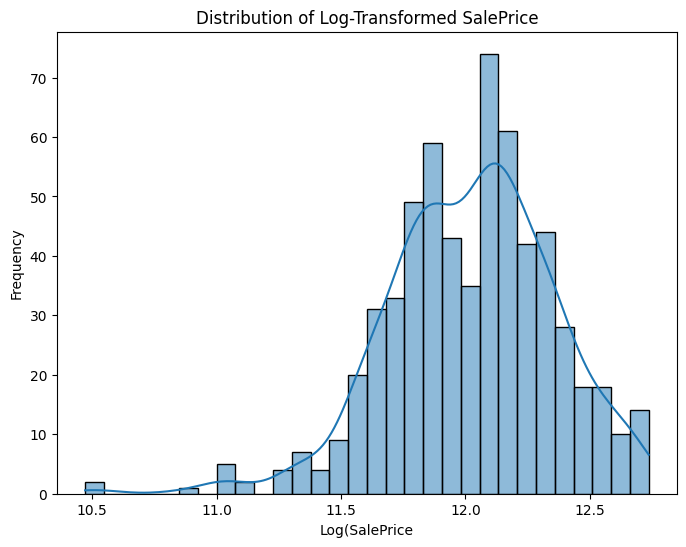

In [35]:
# Plotting the target variable SalePrice distribution after log transformation
plt.figure(figsize=(8, 6))
sns.histplot(np.log(final_df['SalePrice']), kde=True, bins=30)
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice')
plt.ylabel('Frequency')
plt.show()  

In [36]:
# Updating the target variable SalePrice with log transformation
final_df['SalePrice'] = np.log(final_df['SalePrice'])  

### Model Building,Training, Evaluation and Final Predictions

##### Spliting the Target Variable and Predictor Variables

In [37]:
# Split the tatget variable and features for model building
X = final_df.drop(['SalePrice','Id'], axis=1)
y = final_df['SalePrice'] 
# Print the shapes of X and y
print("Shape of feature set X:", X.shape)
print("Shape of target variable y:", y.shape)

Shape of feature set X: (613, 288)
Shape of target variable y: (613,)


In [39]:
# Display first few rows of feature set X and y
print("First few rows of feature set X:", X.head())
print("First few rows of target variable y:", y.head())

First few rows of feature set X:    LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide

#### Train and Test Data Split:

In [40]:
# Splitting the train and test dataset using sklearn train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape) 
print("Shape of y_test:", y_test.shape)

Shape of X_train: (490, 288)
Shape of y_train: (490,)
Shape of X_test: (123, 288)
Shape of y_test: (123,)


### Min Max Scaling

In [41]:
# Create numeric cols
numeric_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

In [42]:
# Data Normalization usning sklearn MinMaxScaler for better model performance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
## Scale the numerical columns 
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [44]:
# List of alpha values for Ridge and Lasso Regression for GridSearchCV
alpha_values = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

#### Ridge Model:

In [45]:
# Using Ridge Regression for model building and cross validation
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
ridge_model_cv = GridSearchCV(
    estimator=ridge,
    param_grid=alpha_values,
    scoring='neg_mean_absolute_error',
    cv=5,
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)
ridge_model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/util

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
# Displaying the best parameters and score for Ridge Regression
print("Best parameters for Ridge Regression:", ridge_model_cv.best_params_)

Best parameters for Ridge Regression: {'alpha': 2.0}


In [47]:
# Display the result of cross-validation
print ("Cross-validation results for Ridge Regression:\n", ridge_model_cv.cv_results_)

Cross-validation results for Ridge Regression:
 {'mean_fit_time': array([0.01039481, 0.01123104, 0.00675521, 0.00269523, 0.00257292,
       0.00262685, 0.0024437 , 0.00248618, 0.00253358, 0.00249286,
       0.00246387, 0.00240736, 0.00234861, 0.00229878, 0.00252318,
       0.00251698, 0.00243645, 0.00253291, 0.00268106, 0.00244579,
       0.00258064, 0.00291038, 0.00260777, 0.0024981 , 0.00246534,
       0.00249028, 0.00247602]), 'std_fit_time': array([1.12801314e-03, 1.33088096e-03, 4.58423842e-03, 1.02288473e-04,
       1.11102198e-04, 1.14708270e-04, 1.40740618e-04, 1.08144039e-04,
       1.30056896e-04, 9.53836904e-05, 6.29739972e-05, 8.38695972e-05,
       1.01748089e-04, 1.91152913e-04, 2.72465103e-04, 3.33741730e-04,
       2.49125918e-04, 5.02701679e-04, 8.65215438e-04, 2.94415210e-04,
       2.90530663e-04, 9.45060440e-04, 1.62130482e-04, 1.07664445e-04,
       8.46222203e-05, 4.53216097e-05, 2.06797156e-04]), 'mean_score_time': array([0.00881319, 0.00935373, 0.00443878, 0.001

#### The best value of Aplha is 1, as per the above cross validation result.

In [48]:
# Crating Ridge Regression model with best alpha value found from GridSearchCV
best_alpha_ridge = ridge_model_cv.best_params_['alpha']
print("Best alpha value for Ridge Regression:", best_alpha_ridge)
ridge_final_model = Ridge(alpha=best_alpha_ridge)
ridge_final_model.fit(X_train, y_train)
# Predicting on test data
y_pred_ridge = ridge_final_model.predict(X_test)
# Evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}')


Best alpha value for Ridge Regression: 2.0
Ridge Regression - Mean Squared Error: 0.018288216266787883, R^2 Score: 0.8685457733694272


In [49]:
# Display the coefficients of the Ridge Regression model
print("Ridge Regression Coefficients:\n", ridge_final_model.coef_)   

Ridge Regression Coefficients:
 [-0.018018    0.00608245  0.0983102   0.02544517  0.00339314  0.14331014
  0.          0.03592078  0.16391399  0.15536307  0.14485661  0.
  0.20606104  0.01857533  0.          0.08740706  0.03911446  0.01188699
  0.          0.06693963 -0.00581695  0.05940271  0.10730279  0.11136861
  0.04234788  0.04506062  0.          0.          0.          0.
  0.          0.01091871  0.00400927 -0.04588684  0.         -0.01548798
  0.04752183 -0.03766358  0.06661984  0.         -0.00396322 -0.00737171
 -0.02401719  0.00147778 -0.08874137 -0.00092623 -0.00574836  0.06101907
  0.02168605  0.06089321  0.03126644  0.          0.02811012 -0.02123427
  0.02431804  0.00395081  0.00336365 -0.00583505 -0.03981987  0.01351965
  0.          0.01570345 -0.03076118 -0.00736156 -0.0252432   0.0458219
 -0.0200211   0.          0.          0.03192997  0.01386042 -0.01877471
  0.11436991 -0.07204917 -0.01205748 -0.05460094 -0.0296275  -0.03433434
 -0.01316328  0.03232342 -0.02134109

#### Compare the R Squared, MSE, RSS and RMSE for Ridge Regression

In [50]:
# Compare the R Squared, MSE, RSS and RMSE for Ridge Regression

y_train_pred = ridge_final_model.predict(X_train)
y_pred = ridge_final_model.predict(X_test)
# Training metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rss_train = np.sum(np.square(y_train - y_train_pred))
rmse_train = np.sqrt(mse_train)

# Testing metrics
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
rss_test = np.sum(np.square(y_test - y_pred))
rmse_test = np.sqrt(mse_test)
# Display the results
print(f'Ridge Regression Training - MSE: {mse_train}, R^2: {r2_train}, RSS: {rss_train}, RMSE: {rmse_train}')
print(f'Ridge Regression Testing - MSE: {mse_test}, R^2: {r2_test}, RSS: {rss_test}, RMSE: {rmse_test}')

Ridge Regression Training - MSE: 0.005257330566085671, R^2: 0.949774688762443, RSS: 2.576091977381979, RMSE: 0.07250745179694064
Ridge Regression Testing - MSE: 0.018288216266787883, R^2: 0.8685457733694272, RSS: 2.2494506008149098, RMSE: 0.13523393163991013


In [65]:
# Identifying top 10 features based on absolute coefficient values from Ridge Regression
model = ridge_final_model
coefs = pd.Series(model.coef_, index=X_train.columns)
top15 = coefs.abs().sort_values(ascending=False).head(15)

print("Top 15 features by co-efficient absolute values:")
print(top15.index.tolist())

Top 15 features by co-efficient absolute values:
['OverallCond_3', 'GrLivArea', 'OverallQual_2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'Neighborhood_Crawfor', 'GarageArea', 'GarageCars', 'KitchenQual_Fa', 'YearBuilt', 'OverallQual_9', 'SaleType_CWD', 'Exterior1st_BrkFace']


### Top 10 feature list to be considered w.r.t ridge regression model
- ['OverallCond_3', 'GrLivArea', 'OverallQual_2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'Neighborhood_Crawfor', 'GarageArea', 'GarageCars', 'KitchenQual_Fa', 'YearBuilt', 'OverallQual_9', 'SaleType_CWD', 'Exterior1st_BrkFace']

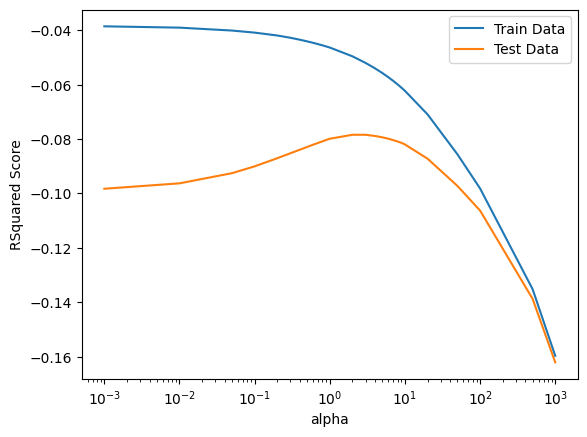

In [52]:
## Ridge cross validation results
results= pd.DataFrame(ridge_model_cv.cv_results_)
## Plotting R2 score vs alpha values
plt.plot(results['param_alpha'], results['mean_train_score'], label='Train Data')
plt.plot(results['param_alpha'], results['mean_test_score'], label='Test Data')
plt.xlabel('alpha')
plt.ylabel('RSquared Score')
plt.xscale('log')
plt.legend()
plt.show()

### Lasso Regression Model 

In [ ]:
# Creating Lasso Regression for model building and cross validation
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_model_cv = GridSearchCV(
    estimator=lasso,
    param_grid=alpha_values,
    scoring='neg_mean_absolute_error',
    cv=5,
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)
lasso_model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279:

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Display the best parameters and score for Lasso Regression
print("Best parameters for Lasso Regression:", lasso_model_cv.best_params_)

Best parameters for Lasso Regression: {'alpha': 0.001}


#### Best Parameter for Lasso Regression is Alpha: 0.001

In [67]:
# Display the result of cross-validation
print ("Cross-validation results for Lasso Regression:\n", lasso_model_cv.cv_results_)

Cross-validation results for Lasso Regression:
 {'mean_fit_time': array([0.00867205, 0.00542364, 0.00475802, 0.00384822, 0.00343261,
       0.00361805, 0.00308924, 0.00326242, 0.00329905, 0.00287261,
       0.0029592 , 0.00354099, 0.00357394, 0.00296245, 0.0029254 ,
       0.00361519, 0.00305452, 0.00314784, 0.0031044 , 0.00341659,
       0.00389218, 0.00380616, 0.00391641, 0.00296307, 0.00377016,
       0.00334878, 0.00312676]), 'std_fit_time': array([8.16436864e-04, 4.83348417e-04, 6.41960672e-04, 1.56247292e-04,
       9.54164856e-05, 6.11796000e-04, 1.93318358e-04, 4.18849770e-04,
       3.83794359e-04, 1.09386756e-04, 7.39596414e-05, 8.77161374e-04,
       7.24228800e-04, 1.71225750e-04, 1.31608697e-04, 7.66449430e-04,
       3.46238504e-04, 6.00613890e-04, 4.40528181e-04, 5.80920308e-04,
       1.34070579e-03, 1.72430754e-03, 1.35536898e-03, 2.01783322e-04,
       6.39617345e-04, 2.35451084e-04, 1.62119206e-04]), 'mean_score_time': array([0.00171666, 0.00136657, 0.00137095, 0.001

In [68]:
# As per best alpha value from GridSearchCV, creating Lasso Regression model is 0.01
best_alpha_lasso = lasso_model_cv.best_params_['alpha']
print("Best alpha value for Lasso Regression:", best_alpha_lasso)
lasso_final_model = Lasso(alpha=best_alpha_lasso)
lasso_final_model.fit(X_train, y_train)
# Predicting on test data
y_pred_lasso = lasso_final_model.predict(X_test)
# Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}')

Best alpha value for Lasso Regression: 0.001
Lasso Regression - Mean Squared Error: 0.01701443833402708, R^2 Score: 0.8777015866323229


In [70]:
# Display the lasso coefficients 
print("Lasso Regression Coefficients:\n", lasso_final_model.coef_)

Lasso Regression Coefficients:
 [ 0.00000000e+00  0.00000000e+00  1.54715705e-01  3.36423903e-02
  0.00000000e+00  1.09660652e-01  0.00000000e+00  0.00000000e+00
  1.94213371e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.72571095e-01  2.05382568e-02  0.00000000e+00  1.70529191e-02
  1.47434749e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.57588653e-02  1.27410743e-01  5.96292026e-02
  3.37496295e-02  1.51138668e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.63570793e-04
  0.00000000e+00 -5.59779475e-02  0.00000000e+00 -0.00000000e+00
  9.54330349e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -6.36538866e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -2.09887496e-02  0.00000000e+00
  1.37029360e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.000000

In [71]:
# Compare the R Squared, MSE, RSS and RMSE for Lasso Regression
y_train_pred = lasso_final_model.predict(X_train)
y_pred = lasso_final_model.predict(X_test)
# Training metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rss_train = np.sum(np.square(y_train - y_train_pred))
rmse_train = np.sqrt(mse_train)
# Testing metrics
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
rss_test = np.sum(np.square(y_test - y_pred))
rmse_test = np.sqrt(mse_test)
# Display the results
print(f'Lasso Regression Training - MSE: {mse_train}, R^2: {r2_train}, RSS: {rss_train}, RMSE: {rmse_train}')
print(f'Lasso Regression Testing - MSE: {mse_test}, R^2: {r2_test}, RSS: {rss_test}, RMSE: {rmse_test}')

Lasso Regression Training - MSE: 0.007438430039377301, R^2: 0.928937802340879, RSS: 3.6448307192948777, RMSE: 0.08624633348367512
Lasso Regression Testing - MSE: 0.01701443833402708, R^2: 0.8777015866323229, RSS: 2.0927759150853307, RMSE: 0.13043940483621919


In [73]:
# Identifying top 10 features based on absolute coefficient values from Lasso Regression
model = lasso_final_model
coefs = pd.Series(model.coef_, index=X_train.columns)
top15 = coefs.abs().sort_values(ascending=False).head(15)

print("Top 15 features by co-efficient absolute values:")
print(top15.index.tolist())

Top 15 features by co-efficient absolute values:
['GrLivArea', 'OverallCond_3', 'TotalBsmtSF', 'YearBuilt', 'OverallQual_2', 'GarageCars', 'Neighborhood_Crawfor', 'BsmtFinSF1', 'Functional_Typ', 'OverallQual_8', 'OverallQual_9', 'MSSubClass_160', 'Neighborhood_Somerst', 'GarageArea', 'MSSubClass_30']


### Top 10 feature list to be considered w.r.t ridge regression model
- ['GrLivArea', 'OverallCond_3', 'TotalBsmtSF', 'YearBuilt', 'OverallQual_2', 'GarageCars', 'Neighborhood_Crawfor', 'BsmtFinSF1', 'Functional_Typ', 'OverallQual_8', 'OverallQual_9', 'MSSubClass_160', 'Neighborhood_Somerst', 'GarageArea', 'MSSubClass_30']

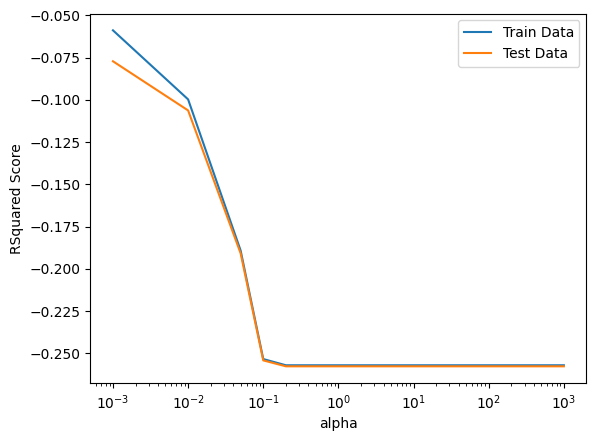

In [74]:
## Ridge cross validation results
results= pd.DataFrame(lasso_model_cv.cv_results_)
## Plotting R2 score vs alpha values
plt.plot(results['param_alpha'], results['mean_train_score'], label='Train Data')
plt.plot(results['param_alpha'], results['mean_test_score'], label='Test Data')
plt.xlabel('alpha')
plt.ylabel('RSquared Score')
plt.xscale('log')
plt.legend()
plt.show()

## Model Comparison:


In [79]:
# Function to generate regression report
def _regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rss = np.sum(np.square(y_true - y_pred))
    rmse = np.sqrt(mse)
    return {"MSE": mse, "R2": r2, "RSS": rss, "RMSE": rmse}
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, label="Model"):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train = _regression_report(y_train, y_train_pred)
    test = _regression_report(y_test, y_test_pred)
    print(f"{label} Training - MSE: {train['MSE']}, R^2: {train['R2']}, RSS: {train['RSS']}, RMSE: {train['RMSE']}")
    print(f"{label} Testing  - MSE: {test['MSE']}, R^2: {test['R2']}, RSS: {test['RSS']}, RMSE: {test['RMSE']}")
    return {"train": train, "test": test}
# Function to get top-k positively contributing features (ignore negatives)
def top_positive_features(model, feature_names, k=15, min_coef=0.0, names=False):
    coefs = pd.Series(np.asarray(model.coef_, dtype=float), index=feature_names)
    pos = coefs[coefs > min_coef].sort_values(ascending=False).head(k)
    return pos.index.tolist() if names else pos

# Evaluating Ridge and Lasso models
lasso_results = evaluate_model(lasso_final_model, X_train, y_train, X_test, y_test, label="Lasso Regression")
ridge_results = evaluate_model(ridge_final_model, X_train, y_train, X_test, y_test, label="Ridge Regression")

# Top-15 positive features (filter tiny near-zero coefs)
ridge_top15_pos = top_positive_features(ridge_final_model, X_train.columns, k=15, min_coef=1e-6)
lasso_top15_pos = top_positive_features(lasso_final_model, X_train.columns, k=15, min_coef=1e-6)

print("\nRidge Top 15 positive features:")
print(ridge_top15_pos)
print("\nLasso Top 15 positive features:")
print(lasso_top15_pos)

Lasso Regression Training - MSE: 0.007438430039377301, R^2: 0.928937802340879, RSS: 3.6448307192948777, RMSE: 0.08624633348367512
Lasso Regression Testing  - MSE: 0.01701443833402708, R^2: 0.8777015866323229, RSS: 2.0927759150853307, RMSE: 0.13043940483621919
Ridge Regression Training - MSE: 0.005257330566085671, R^2: 0.949774688762443, RSS: 2.576091977381979, RMSE: 0.07250745179694064
Ridge Regression Testing  - MSE: 0.018288216266787883, R^2: 0.8685457733694272, RSS: 2.2494506008149098, RMSE: 0.13523393163991013

Ridge Top 15 positive features:
GrLivArea               0.206061
TotalBsmtSF             0.163914
1stFlrSF                0.155363
2ndFlrSF                0.144857
BsmtFinSF1              0.143310
Neighborhood_Crawfor    0.114370
GarageArea              0.111369
GarageCars              0.107303
YearBuilt               0.098310
OverallQual_9           0.097415
SaleType_CWD            0.092252
Exterior1st_BrkFace     0.089160
FullBath                0.087407
OverallCond_8     

## Inferences: Best features and optimal lambda (Ridge/Lasso)




#### Optimal Lambda (alpha) from GridSearchCV

| Model | Optimal alpha (λ) |
|---|---:|
| Ridge | 2.0 |
| Lasso | 0.001 |

#### Performance comparison (Ridge vs Lasso)

| Model | Split | MSE | R^2 | RSS | RMSE |
|---|---|---:|---:|---:|---:|
| Lasso | Train | 0.007438430039377301 | 0.928937802340879 | 3.6448307192948777 | 0.08624633348367512 |
| Lasso | Test | 0.01701443833402708 | 0.8777015866323229 | 2.0927759150853307 | 0.13043940483621919 |
| Ridge | Train | 0.005257330566085671 | 0.949774688762443 | 2.576091977381979 | 0.07250745179694064 |
| Ridge | Test | 0.018288216266787883 | 0.8685457733694272 | 2.2494506008149098 | 0.13523393163991013 |

#### Top-15 positive features (Ridge and Lasso)

##### Ridge Top 15 positive features
| Rank | Feature | Coefficient |
|---:|---|---:|
| 1 | GrLivArea | 0.206061 |
| 2 | TotalBsmtSF | 0.163914 |
| 3 | 1stFlrSF | 0.155363 |
| 4 | 2ndFlrSF | 0.144857 |
| 5 | BsmtFinSF1 | 0.143310 |
| 6 | Neighborhood_Crawfor | 0.114370 |
| 7 | GarageArea | 0.111369 |
| 8 | GarageCars | 0.107303 |
| 9 | YearBuilt | 0.098310 |
| 10 | OverallQual_9 | 0.097415 |
| 11 | SaleType_CWD | 0.092252 |
| 12 | Exterior1st_BrkFace | 0.089160 |
| 13 | FullBath | 0.087407 |
| 14 | OverallCond_8 | 0.078098 |
| 15 | OverallCond_9 | 0.077135 |

##### Lasso Top 15 positive features
| Rank | Feature | Coefficient |
|---:|---|---:|
| 1 | GrLivArea | 0.672571 |
| 2 | TotalBsmtSF | 0.194213 |
| 3 | YearBuilt | 0.154716 |
| 4 | GarageCars | 0.127411 |
| 5 | Neighborhood_Crawfor | 0.120677 |
| 6 | BsmtFinSF1 | 0.109661 |
| 7 | Functional_Typ | 0.086531 |
| 8 | OverallQual_8 | 0.073924 |
| 9 | OverallQual_9 | 0.071098 |
| 10 | Neighborhood_Somerst | 0.062442 |
| 11 | GarageArea | 0.059629 |
| 12 | BsmtCond_TA | 0.041404 |
| 13 | Condition1_Norm | 0.038232 |
| 14 | GarageYrBlt | 0.035759 |
| 15 | LandSlope_Mod | 0.035291 |

#### Common positive features (Ridge and Lasso)

| Feature | Ridge Coefficient | Lasso Coefficient |
|---|---:|---:|
| GrLivArea | 0.206061 | 0.672571 |
| TotalBsmtSF | 0.163914 | 0.194213 |
| YearBuilt | 0.098310 | 0.154716 |
| GarageCars | 0.107303 | 0.127411 |
| Neighborhood_Crawfor | 0.114370 | 0.120677 |
| BsmtFinSF1 | 0.143310 | 0.109661 |
| OverallQual_9 | 0.097415 | 0.071098 |
| GarageArea | 0.111369 | 0.059629 |

#### Recommended features for Sunrise Housing Company (prioritized by average positive impact across Ridge and Lasso)

| Rank | Feature | Ridge Coefficient | Lasso Coefficient | Priority (avg) |
|---:|---|---:|---:|---:|
| 1 | GrLivArea | 0.206061 | 0.672571 | 0.439316 |
| 2 | TotalBsmtSF | 0.163914 | 0.194213 | 0.179064 |
| 3 | YearBuilt | 0.098310 | 0.154716 | 0.126513 |
| 4 | BsmtFinSF1 | 0.143310 | 0.109661 | 0.126486 |
| 5 | Neighborhood_Crawfor | 0.114370 | 0.120677 | 0.117524 |
| 6 | GarageCars | 0.107303 | 0.127411 | 0.117357 |
| 7 | GarageArea | 0.111369 | 0.059629 | 0.085499 |
| 8 | OverallQual_9 | 0.097415 | 0.071098 | 0.084257 |

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [81]:
# Changing the alpha values double to from 2.0 to 4.0 for Ridge and 0.001 to 0.002 for Lasso Regression

# Ridge Regression
ridge_final_model = Ridge(alpha=4.0)
ridge_final_model.fit(X_train, y_train)
# predicting on test data
y_pred_ridge = ridge_final_model.predict(X_test)
# Lasso Regression
lasso_final_model = Lasso(alpha=0.002)
lasso_final_model.fit(X_train, y_train) 
# predicting on test data
y_pred_lasso = lasso_final_model.predict(X_test)

In [82]:
# Display the best parameters and score for Lasso Regression
print("Best parameters for Lasso Regression:", lasso_model_cv.best_params_)
print("Best parameters for Ridge Regression:", ridge_model_cv.best_params_)
# R2 score for Ridge Regression
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - R^2 Score: {r2_ridge}')
# R2 score for Lasso Regression
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - R^2 Score: {r2_lasso}')  

Best parameters for Lasso Regression: {'alpha': 0.001}
Best parameters for Ridge Regression: {'alpha': 2.0}
Ridge Regression - R^2 Score: 0.8712298647328072
Lasso Regression - R^2 Score: 0.8664613307973125


In [83]:
# RSquare on train and test data for both Ridge and Lasso Regression
# Ridge Regression
y_train_pred_ridge = ridge_final_model.predict(X_train)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
print(f'Ridge Regression - R^2 Score on Train Data: {r2_train_ridge}')
r2_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - R^2 Score on Test Data: {r2_test_ridge}')
# Lasso Regression
y_train_pred_lasso = lasso_final_model.predict(X_train)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
print(f'Lasso Regression - R^2 Score on Train Data: {r2_train_lasso}')
r2_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - R^2 Score on Test Data: {r2_test_lasso}')

Ridge Regression - R^2 Score on Train Data: 0.9417423761649065
Ridge Regression - R^2 Score on Test Data: 0.8712298647328072
Lasso Regression - R^2 Score on Train Data: 0.9033777884532062
Lasso Regression - R^2 Score on Test Data: 0.8664613307973125


In [84]:
# Generate the predictor variables for lasso and ridge regression models
# Function to generate regression report
def _regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rss = np.sum(np.square(y_true - y_pred))
    rmse = np.sqrt(mse)
    return {"MSE": mse, "R2": r2, "RSS": rss, "RMSE": rmse}
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, label="Model"):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train = _regression_report(y_train, y_train_pred)
    test = _regression_report(y_test, y_test_pred)
    print(f"{label} Training - MSE: {train['MSE']}, R^2: {train['R2']}, RSS: {train['RSS']}, RMSE: {train['RMSE']}")
    print(f"{label} Testing  - MSE: {test['MSE']}, R^2: {test['R2']}, RSS: {test['RSS']}, RMSE: {test['RMSE']}")
    return {"train": train, "test": test}
# Function to get top-k positively contributing features (ignore negatives)
def top_positive_features(model, feature_names, k=15, min_coef=0.0, names=False):
    coefs = pd.Series(np.asarray(model.coef_, dtype=float), index=feature_names)
    pos = coefs[coefs > min_coef].sort_values(ascending=False).head(k)
    return pos.index.tolist() if names else pos

# Evaluating Ridge and Lasso models
lasso_results = evaluate_model(lasso_final_model, X_train, y_train, X_test, y_test, label="Lasso Regression")
ridge_results = evaluate_model(ridge_final_model, X_train, y_train, X_test, y_test, label="Ridge Regression")

# Top-15 positive features (filter tiny near-zero coefs)
ridge_top15_pos = top_positive_features(ridge_final_model, X_train.columns, k=15, min_coef=1e-6)
lasso_top15_pos = top_positive_features(lasso_final_model, X_train.columns, k=15, min_coef=1e-6)

print("\nRidge Top 15 positive features:")
print(ridge_top15_pos)
print("\nLasso Top 15 positive features:")
print(lasso_top15_pos)  



Lasso Regression Training - MSE: 0.01011392251458875, R^2: 0.9033777884532062, RSS: 4.955822032148487, RMSE: 0.10056799945603348
Lasso Regression Testing  - MSE: 0.01857820874197595, R^2: 0.8664613307973125, RSS: 2.2851196752630423, RMSE: 0.1363019029286677
Ridge Regression Training - MSE: 0.006098112265489178, R^2: 0.9417423761649065, RSS: 2.988075010089697, RMSE: 0.07809041084210774
Ridge Regression Testing  - MSE: 0.017914799263839314, R^2: 0.8712298647328072, RSS: 2.2035203094522355, RMSE: 0.1338461776213251

Ridge Top 15 positive features:
GrLivArea               0.175040
TotalBsmtSF             0.145325
1stFlrSF                0.142742
BsmtFinSF1              0.128196
2ndFlrSF                0.109206
GarageArea              0.107519
GarageCars              0.099305
Neighborhood_Crawfor    0.096491
FullBath                0.082962
OverallQual_9           0.077880
Exterior1st_BrkFace     0.076314
OverallQual_8           0.074603
TotRmsAbvGrd            0.073154
YearBuilt           

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [85]:

# Top-5 features from lasso regression
top5_features = ['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', 'BsmtFinSF1']


In [86]:
# Drop the other features from X_train and X_test
X_train_new = X_train.drop(top5_features, axis=1)
X_test_new = X_test.drop(top5_features, axis=1)

In [87]:

# Creating Lasso Regression for model building and cross validation
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_model_cv = GridSearchCV(
    estimator=lasso,
    param_grid=alpha_values,
    scoring='neg_mean_absolute_error',
    cv=5,
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/I356153/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# Best alpha value from GridSearchCV
best_alpha_lasso = lasso_model_cv.best_params_['alpha']
print("Best alpha value for Lasso Regression:", best_alpha_lasso)

Best alpha value for Lasso Regression: 0.001


In [89]:
# Lasso Regression model with best alpha value
lasso_final_model = Lasso(alpha=best_alpha_lasso)
lasso_final_model.fit(X_train_new, y_train) 
# predicting on test data  
y_pred_lasso = lasso_final_model.predict(X_test_new)
y_train_pred_lasso = lasso_final_model.predict(X_train_new) 

In [90]:
# Generate the predictor variables for lasso
# Function to generate regression report
def _regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rss = np.sum(np.square(y_true - y_pred))
    rmse = np.sqrt(mse)
    return {"MSE": mse, "R2": r2, "RSS": rss, "RMSE": rmse}
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, label="Model"):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train = _regression_report(y_train, y_train_pred)
    test = _regression_report(y_test, y_test_pred)
    print(f"{label} Training - MSE: {train['MSE']}, R^2: {train['R2']}, RSS: {train['RSS']}, RMSE: {train['RMSE']}")
    print(f"{label} Testing  - MSE: {test['MSE']}, R^2: {test['R2']}, RSS: {test['RSS']}, RMSE: {test['RMSE']}")
    return {"train": train, "test": test}
# Function to get top-k positively contributing features (ignore negatives)
def top_positive_features(model, feature_names, k=15, min_coef=0.0, names=False):
    coefs = pd.Series(np.asarray(model.coef_, dtype=float), index=feature_names)
    pos = coefs[coefs > min_coef].sort_values(ascending=False).head(k)
    return pos.index.tolist() if names else pos

# Evaluating Ridge and Lasso models
lasso_results = evaluate_model(lasso_final_model, X_train_new, y_train, X_test_new, y_test, label="Lasso Regression")

# Top-15 positive features (filter tiny near-zero coefs)
lasso_top15_pos = top_positive_features(lasso_final_model, X_train_new.columns, k=15, min_coef=1e-6)

print("\nLasso Top 15 positive features:")
print(lasso_top15_pos)  



Lasso Regression Training - MSE: 0.007952975927461655, R^2: 0.9240221465626874, RSS: 3.8969582044562108, RMSE: 0.08917945911173523
Lasso Regression Testing  - MSE: 0.01826619188614485, R^2: 0.8687040828448955, RSS: 2.2467416019958164, RMSE: 0.13515247643363718

Lasso Top 15 positive features:
1stFlrSF                0.634122
2ndFlrSF                0.360898
GarageArea              0.183009
Neighborhood_Crawfor    0.125662
Functional_Typ          0.099429
OverallQual_9           0.091172
GarageYrBlt             0.088709
OverallQual_8           0.083695
Neighborhood_Somerst    0.068826
BsmtCond_TA             0.048229
GarageQual_TA           0.045781
WoodDeckSF              0.044579
FullBath                0.044424
BsmtFullBath            0.044376
Condition1_Norm         0.041513
dtype: float64
